# Prerequisite: Data Set


## Automated Download and Extraction

In [1]:
import utils

url = "https://snap.stanford.edu/data/CollegeMsg.txt.gz"
file_path = utils.download_and_extract_data(
    zip_url=url,
    zip_filename=None,  # detect from url
    filetype="csv.gz",
)

Not running in Colab. Using local folder: /Users/boris/Documents/teaching/ML on graphs/ML-on-Graphs/data
Using data folder: /Users/boris/Documents/teaching/ML on graphs/ML-on-Graphs/data
ZIP file already exists.
Extraction complete.


This dataset is comprised of private messages sent on an online social network at the University of California, Irvine. Users could search the network for others and then initiate conversation based on profile information. An edge (u, v, t) means that user u sent a private message to user v at time t. The dataset here is derived from the one hosted by Tore Opsahl, but we have parsed it so that it can be loaded directly into SNAP as a temporal network.

- **Temporal Network**: Contains timestamped messages sent between users at a university over 193 days, forming a dynamic network.

- **Nodes and Edges**: Each node is a user; each edge is a message sent between two users, with direction and time.

- **Format**: The dataset is a plain text file with three columns: sender ID, receiver ID, and Unix timestamp (no header).

- **Directed and Unweighted**: Edges represent directed communication events without weights—multiple messages between the same pair are separate entries.

- **Use Case**: Commonly used for studying temporal network properties, dynamic graph modeling, and information diffusion.

## 1. Random Graphs – Erdős–Rényi Model
# 1.1: Fundamentals of Random Graphs (Erdős–Rényi)
## Overview
In this section, we will explore the core concepts behind the Erdős–Rényi (ER) model of random graphs. The ER model is often denoted $ G(n, p) $, indicating a graph of $ n $ nodes where each pair of nodes has a probability $ p $ of being connected by an edge, independently of other edges.
### a. Objective
- Understand the foundational concepts of the Erdős–Rényi $ G(n, p) $ random graph model.
- Learn how probability distributions govern the formation of edges in such graphs.
- Gain insight into how these theoretical constructs compare with a real dataset (CollegeMsg).
### b. Introduction
The Erdős–Rényi model is one of the simplest and most studied random graph models. In this model:
- We begin with $ n $ isolated vertices.
- For every possible pair of vertices (i, j), we include the edge (i, j) with probability $ p $, independent of every other pair.

This construction allows us to derive expected values for properties like the average degree, the size of connected components, and the likelihood of the graph being connected. We’ll contrast these theoretical properties with the real-world data from **CollegeMsg**, a temporal network of private messages at UC Irvine.
### c. Probability Distributions in G(n, p)
- **Degree Distribution:** In $ G(n, p) $, each node's degree follows (approximately) a Binomial distribution $ \text{Binomial}(n-1, p) $. For large $ n $ and small $ p $, it can be approximated by a Poisson distribution.
- **Connectivity:** As $ n \to \infty $, there exist phase transitions in terms of when the graph forms a giant component (often around $ p = \frac{1}{n} $) and when it becomes connected (often around $ p = \frac{\ln(n)}{n} $).
- **Clustering:** The local clustering coefficient is typically low, since edges are formed randomly without any triadic closure mechanism.
### d. Examples/Code (using CollegeMsg dataset) and Visualization
Below, we will:
1. Load and preview the **CollegeMsg** dataset.
2. Construct a basic Erdős–Rényi random graph with approximately the same number of nodes.
3. Compare basic graph metrics (like average degree) between the real data and the random graph.


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Step 1: Load the CollegeMsg Dataset
# For demonstration, let's assume we have loaded the data into an edge list.
# We'll show a pseudo-code snippet for loading from 'CollegeMsg.txt'.
edge_list = []
with open(file_path, "r") as f:
    for line in f:
        # The file format is typically: u v t
        # We'll ignore t for a static representation.
        parts = line.strip().split()
        if len(parts) == 3:
            u, v, _ = parts
            edge_list.append((int(u), int(v)))

# Create a directed graph from the edges
G_college = nx.DiGraph()
G_college.add_edges_from(edge_list)

# Step 2: Basic Stats for the CollegeMsg Graph
num_nodes_college = G_college.number_of_nodes()
num_edges_college = G_college.number_of_edges()
print("CollegeMsg Graph:")
print(f"Number of Nodes: {num_nodes_college:6,}")
print(f"Number of Edges: {num_edges_college:6,}")

CollegeMsg Graph:
Number of Nodes:  1,899
Number of Edges: 20,296


In [3]:
# Step 3: Construct an ER (Erdős–Rényi) Graph with the same number of nodes.
# We'll use a probability p ~ (average_degree / possible_edges) as a rough guess.
possible_edges = num_nodes_college * (num_nodes_college - 1)
avg_degree_approx = (
    num_edges_college
) / num_nodes_college  # for directed, adjust if needed
p_est = avg_degree_approx / (num_nodes_college - 1)

print("\nEstimated probability p for ER model:", p_est)

G_er = nx.erdos_renyi_graph(n=num_nodes_college, p=p_est, directed=True)

# Step 4: Compare some metrics
num_edges_er = G_er.number_of_edges()
print("ER Graph:")
print(f"Number of Nodes: {G_er.number_of_nodes():6,}")
print(f"Number of Edges: {num_edges_er:6,}")


Estimated probability p for ER model: 0.005631048674611617
ER Graph:
Number of Nodes:  1,899
Number of Edges: 20,449


Text(0.5, 1.0, 'ER Subgraph (Sample)')

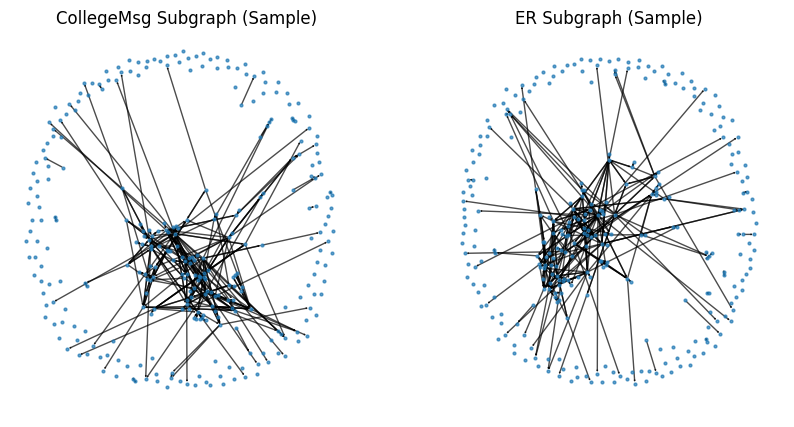

In [4]:
# Step 5: Visualization Example: Draw a small sample from each graph
# (only feasible if the graph is not too large or if we sample a subgraph)
plt.figure(figsize=(10, 5))
K = 300
# Subplot 1: Sample of the CollegeMsg graph
plt.subplot(1, 2, 1)
# Convert nodes to a list for random.sample()
sample_nodes_college = random.sample(list(G_college.nodes()), min(K, num_nodes_college))
subG_college = G_college.subgraph(sample_nodes_college)
nx.draw(subG_college, node_size=4, alpha=0.7, arrowsize=1)
plt.title("CollegeMsg Subgraph (Sample)")

# Subplot 2: Sample of the ER graph
plt.subplot(1, 2, 2)
# Convert nodes to a list for random.sample()
sample_nodes_er = random.sample(list(G_er.nodes()), min(K, G_er.number_of_nodes()))
subG_er = G_er.subgraph(sample_nodes_er)
nx.draw(subG_college, node_size=4, alpha=0.7, arrowsize=1)
plt.title("ER Subgraph (Sample)")

### e. Explanation
From the above code:
- We read the **CollegeMsg** file to build a directed graph. We ignore temporal data to approximate a “static” graph for quick comparison.
- We estimate the probability $ p $ used in the ER model by matching average degrees. The intuition: if the real graph has $ E $ edges and $ N $ nodes, then the average degree is roughly $ 2E / N $ (for directed graphs, a separate in-degree and out-degree might be considered).
- The visualizations compare a small sub-sample of each graph. Notice the random distribution of edges in the ER model vs. potentially more structured connectivity in the real CollegeMsg subgraph.
### f. Properties of Connectivity and Components
In the Erdős–Rényi model, we can calculate the probability or expected values for:
- **Number of Components**: For $ p $ above a certain threshold, we expect a giant (large) component to emerge.
- **Connectivity**: For $ p $ near $ \frac{\ln(n)}{n} $, we see a high probability the graph is connected (for an undirected version).
- **Average Distance**: Typically smaller than in a more clustered, real-world graph.



### g. Practical Activities/Code (using CollegeMsg dataset) and Visualization
**Activity Prompt**:
- Compute the strongly connected components (SCCs) of the **CollegeMsg** directed graph and compare with those of the ER graph.
- Plot the size distribution of SCCs for both.

Try to accomplish this by writing code that:
1. Uses `nx.strongly_connected_components(G)`.
2. Counts the size of each component.
3. Plots a histogram or bar chart of component sizes. (`plt.hist`)

=== PRACTICAL ACTIVITY: Strongly Connected Components ===
CollegeMsg SCC sizes:
1       595
2         5
1294      1
Name: count, dtype: int64
ER Graph SCC sizes:
1899    1
Name: count, dtype: int64


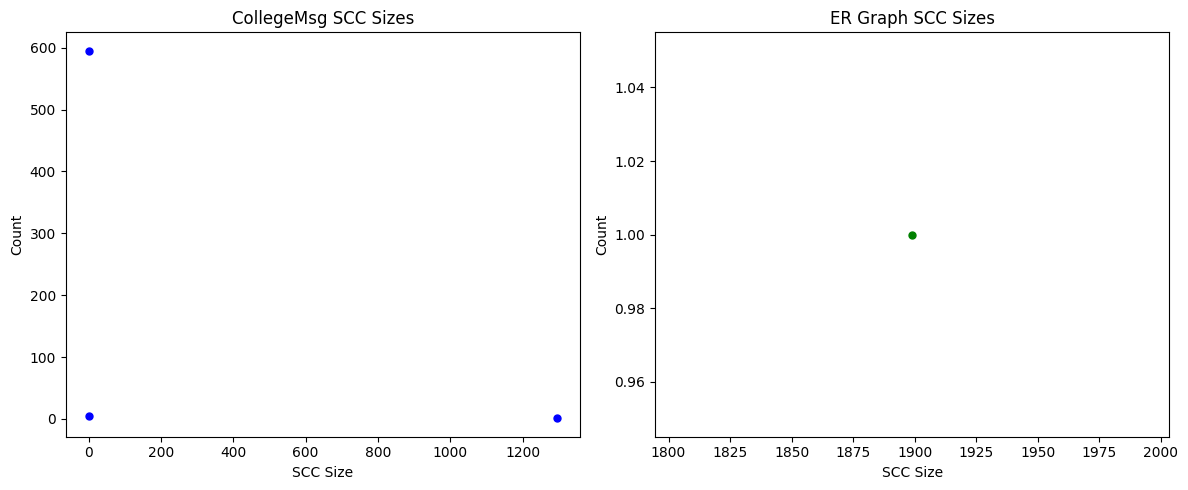

In [5]:
# Example Starter Code for Activity
print("=== PRACTICAL ACTIVITY: Strongly Connected Components ===")
...


def strongly_connected_component_sizes(G):
    sccs = list(nx.strongly_connected_components(G))
    sizes = [len(scc) for scc in sccs]
    return sizes


import pandas as pd

sizes_college = pd.Series(strongly_connected_component_sizes(G_college)).value_counts()
sizes_er = pd.Series(strongly_connected_component_sizes(G_er)).value_counts()
print(f"CollegeMsg SCC sizes:")
print(sizes_college)
print(f"ER Graph SCC sizes:")
print(sizes_er)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ax = axes[0]
ax.plot(
    sizes_college.index,
    sizes_college.values,
    color="blue",
    marker="o",
    markersize=5,
    ls="none",
)
ax.set_title("CollegeMsg SCC Sizes")
ax.set_xlabel("SCC Size")
ax.set_ylabel("Count")

ax = axes[1]
ax.plot(
    sizes_er.index, sizes_er.values, color="green", marker="o", markersize=5, ls="none"
)
ax.set_title("ER Graph SCC Sizes")
ax.set_xlabel("SCC Size")
ax.set_ylabel("Count")

plt.tight_layout()
plt.show()

In [6]:
pd.Series([len(c) for c in nx.strongly_connected_components(G_college)]).value_counts(
    normalize=False
)

1       595
2         5
1294      1
Name: count, dtype: int64

### h. Observations on Real vs. Random Networks
- Real networks often exhibit clustering and community structures beyond random chance.
- Erdős–Rényi models are good baseline models, but they may fail to capture high clustering or heavy-tailed degree distributions seen in many real-world networks (as we might observe in the CollegeMsg graph).
- Random models can still be insightful for studying fundamental properties and phase transitions in large graphs.
### Quiz
1. What does $G(n, p)$ represent in the context of Erdős–Rényi random graphs?
2. In the $ G(n, p) $ model, which distribution often approximates the degree distribution for large $ n $ and small $ p $?
3. How do we typically choose $ p $ to approximate the real-world average degree in a network?
4. Give one reason why Erdős–Rényi graphs might fail to model real networks accurately.
5. (True/False) In an ER graph, the probability of having a specific edge depends on the presence or absence of other edges.
### Activities to Practice
**Activity A**: Modify the code that estimates $ p $ in the ER model to use a different approach. For example, try setting $ p = 0.01 $ or $ p = 0.05 $ directly and compare the resulting graph’s average degree to that of CollegeMsg.

**Activity B**: Compute the in-degree and out-degree distributions of both the CollegeMsg graph and the ER graph. Plot them on a log-scale. Observe if they follow any recognizable pattern (e.g., Poisson-like vs. real network distribution).

**Activity C**: Create a small interactive function (e.g., with a slider or manual input) that lets you change $ p $ and visualize how the structure of the ER graph evolves.



# 1.2: Generating and Analyzing Erdős–Rényi Graphs
## Overview
In this section, we go deeper into the practical aspects of creating and studying Erdős–Rényi (ER) graphs. We will:
- Explore methods to choose appropriate parameters for $ G(n, p) $ or $ G(n, M) $.
- Simulate random networks and compare them to our real **CollegeMsg** dataset.
- Investigate key graph properties such as degree distributions, and learn how to generate visual comparisons.
### a. Objective
- Understand the steps and considerations when generating an Erdős–Rényi graph.
- Learn how to analyze and visualize ER graphs (e.g., degree distributions, clustering).
- Compare ER-generated networks to real-world data from **CollegeMsg**.
### b. Introduction
In generating an Erdős–Rényi graph, the two main variants are:
- **$ G(n, p) $**: We specify the probability $ p $ that any given pair of nodes is connected by an edge.
- **$ G(n, M) $**: We specify the exact number of edges $ M $ to be placed among $ n $ nodes randomly.

For real networks, selecting $ p $ often comes from empirical observations (e.g., average degree) or theoretical considerations (phase transitions). Once generated, we compare features like the degree distribution, clustering coefficients, or connected components to see how well random graphs approximate real data.
### c. Parameter Selection (n, p) and Constraints
1. **Number of Nodes (n):** We typically match the number of nodes in the real network.  
2. **Probability (p):**
   - We can guess $ p \approx \frac{\bar{k}}{n} $, where $ \bar{k} $ is the observed average degree in the dataset.
   - Alternatively, if we want the same total number of edges $ M $ as in the real network, we can solve for $ p $ from $ M \approx p \times \frac{n(n-1)}{2} $ (undirected) or $ M \approx p \times n(n-1) $ (directed).
3. **Constraints:**  
   - The value of $ p $ must be between $ 0 $ and $ 1 $.  
   - For very large $ n $, generating a fully dense or extremely sparse graph might be unrepresentative or computationally expensive.
### d. Examples/Code (simulate random edges vs. CollegeMsg edges)
The code snippet below demonstrates:
1. How to create an ER graph matching the number of nodes in **CollegeMsg**.  
2. How to compare the edge count or average degree to the real network.  
3. A brief visualization of both degree distributions.


In [7]:
# Merge Python Code Cells Where Possible

import networkx as nx
import matplotlib.pyplot as plt
import random

# --------------------------------------------
# Assume we have G_college from the previous section
# G_college is a directed graph for CollegeMsg data
# --------------------------------------------

# 1) Basic stats from the real graph
num_nodes_college = G_college.number_of_nodes()
num_edges_college = G_college.number_of_edges()

print("CollegeMsg Graph Stats:")
print(f"Nodes: {num_nodes_college}")
print(f"Edges: {num_edges_college}")

CollegeMsg Graph Stats:
Nodes: 1899
Edges: 20296


In [8]:
# 2) Choose p to approximate the real network’s average degree
#    For directed graphs, carefully consider how to measure average degree:
#    avg_degree ~ 2 * (edges / nodes)
avg_degree_college = (2 * num_edges_college) / num_nodes_college  # TODO: why 2?
p_guess = avg_degree_college / (num_nodes_college - 1)

print(f"\nEstimated average degree of CollegeMsg: {avg_degree_college:.2f}")
print(f"Implied probability (p_guess) for ER: {p_guess:.5f}")


Estimated average degree of CollegeMsg: 21.38
Implied probability (p_guess) for ER: 0.01126


In [9]:
# 3) Generate an ER graph with the same number of nodes
G_er_approx = nx.erdos_renyi_graph(n=num_nodes_college, p=p_guess, directed=True)

# 4) Compare edge counts
print("\nER Graph Stats (Approx):")
print(f"Nodes: {G_er_approx.number_of_nodes()}")
print(f"Edges: {G_er_approx.number_of_edges()}")


ER Graph Stats (Approx):
Nodes: 1899
Edges: 40636


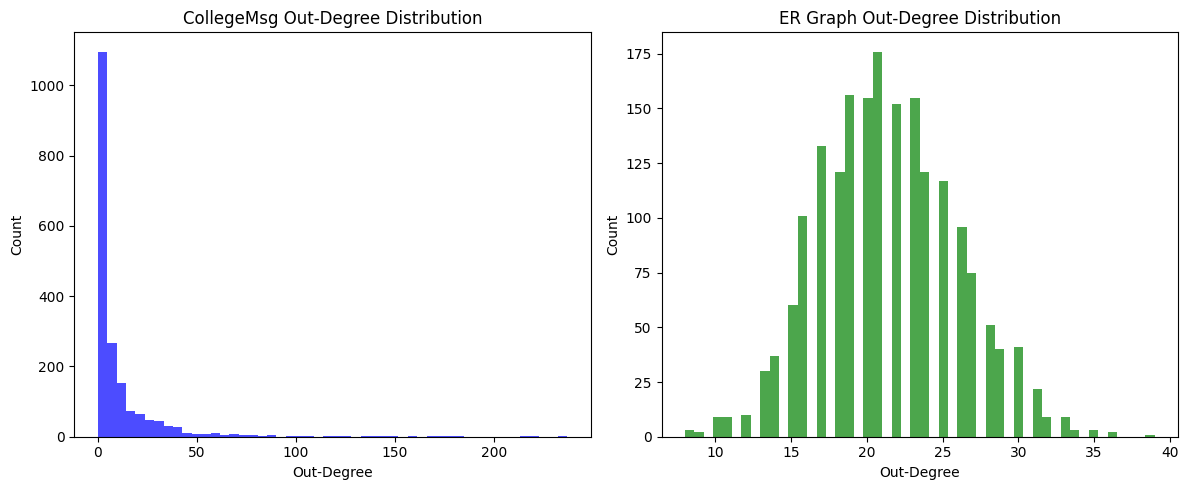

In [10]:
# 5) Quick Visualization: Degree Distributions
#    We'll plot out-degree distributions for demonstration.
out_degs_college = [G_college.out_degree(n) for n in G_college.nodes()]
out_degs_er = [G_er_approx.out_degree(n) for n in G_er_approx.nodes()]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(out_degs_college, bins=50, color="blue", alpha=0.7)
plt.title("CollegeMsg Out-Degree Distribution")
plt.xlabel("Out-Degree")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
plt.hist(out_degs_er, bins=50, color="green", alpha=0.7)
plt.title("ER Graph Out-Degree Distribution")
plt.xlabel("Out-Degree")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

A more accepted way to demonstrate the degree distribution is to plot log-log scaterplot 

In [11]:
import numpy as np


def log_log_distribution(a, min_val=None, max_val=None, add_1=False):
    if min_val is None:
        min_val = min(a)
    if max_val is None:
        max_val = max(a)
    x = np.arange(min_val, max_val + 1)
    y = np.array([a.count(i) for i in x])
    if add_1:
        x += 1
        y += 1
    return np.log10(x), np.log10(y)


def log_log_distribution_plot(
    values, title, min_val=None, max_val=None, add_1=False, ax=None
):
    if ax is None:
        ax = plt.gca()
    x, y = log_log_distribution(values, min_val, max_val, add_1)
    ax.plot(x, y, ".")
    ax.set_xlabel("log10(degree)")
    ax.set_ylabel("log10(frequency)")

/var/folders/xy/6n3m38qx423b_gjbx89x02b40000gn/T/ipykernel_69863/438044091.py:14: RuntimeWarning: divide by zero encountered in log10
  return np.log10(x), np.log10(y)


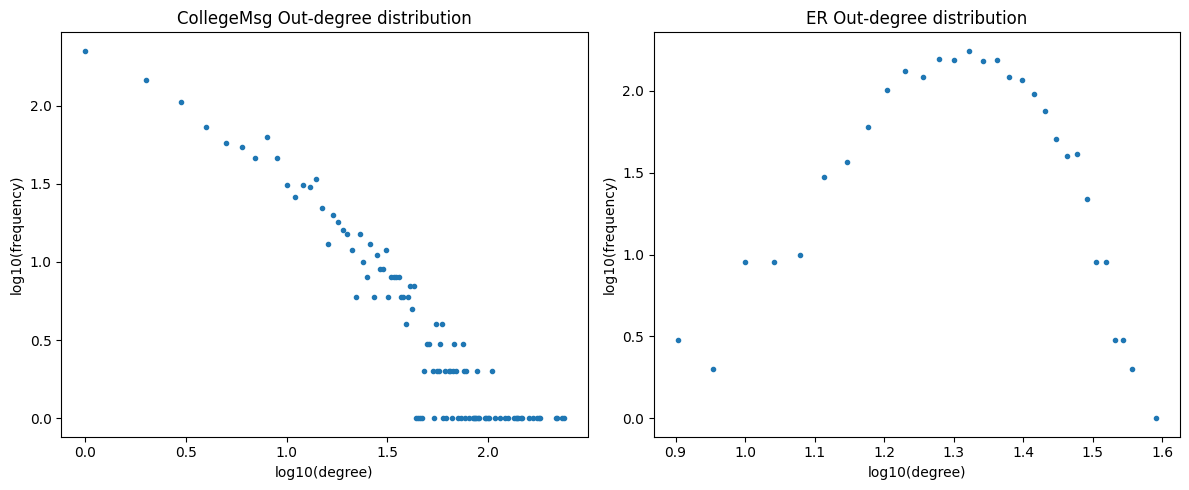

In [12]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
log_log_distribution_plot(out_degs_college, "CollegeMsg Out-degree distribution")
plt.title("CollegeMsg Out-degree distribution")

plt.subplot(1, 2, 2)
log_log_distribution_plot(out_degs_er, "ER Out-degree distribution")
plt.title("ER Out-degree distribution")

plt.tight_layout()
plt.show()

### e. Explanation
1. **Average Degree:** We computed it from our **CollegeMsg** graph and used it to estimate $ p $ for the ER model. This provides a first-order approximation of how “dense” the random graph should be.  
2. **Graph Stats:** Matching node counts is straightforward, but matching edges or average degree can still produce noticeable differences in degree distributions, connectivity, etc.  
3. **Degree Distribution:** As shown by the histograms, a real network might exhibit more skew or a heavier tail compared to the roughly Poisson-like distribution in an ER graph.
### f. Degree Distribution Analysis
- In an ER graph $ G(n, p) $, each node’s degree follows a Binomial distribution (or Poisson in the limit of small $ p $ and large $ n $).
- In the **CollegeMsg** dataset, real social behaviors and user dynamics can cause more variation and a heavier tail in the degree distribution.
- Comparing histograms or computing statistical measures (e.g., KS test) is a useful step to gauge similarity.

**Reflect on the shape of each distribution and how closely—or loosely—ER graphs approximate reality**


### h. Clustering Coefficients in ER Graphs
- **Clustering Coefficient:** In an ER graph, the global clustering coefficient (average fraction of neighbors of a node that are also neighbors to each other) is roughly $ p $ in the undirected case. For directed graphs, we define analogous measures for mutual connections.
- **Real Networks:** Typically show higher clustering due to triadic closure (friends of friends becoming friends), which random graphs do not inherently capture.
- **Comparison:** We can compute the clustering coefficient for **CollegeMsg** and for our ER graph to see if there's a big disparity.


In [13]:
# Demonstration Code: Clustering in a Directed Graph
# (Note: nx.average_clustering works for undirected graphs. For directed graphs,
#        we might convert or use specialized measures. Here we'll do a quick trick.)

# Convert to undirected for a quick approximation of clustering
G_college_undirected = G_college.to_undirected()
G_er_undirected = G_er_approx.to_undirected()

clustering_college = nx.average_clustering(G_college_undirected)
clustering_er = nx.average_clustering(G_er_undirected)

print(f"Approx. Clustering Coefficient (CollegeMsg): {clustering_college:.2f}")
print(f"Approx. Clustering Coefficient (ER):         {clustering_er:.2f}")

Approx. Clustering Coefficient (CollegeMsg): 0.11
Approx. Clustering Coefficient (ER):         0.02


### Quiz
1. When generating an ER graph $ G(n, p) $, how do you select $ p $ if you want to match a real network’s average degree?
2. List two ways in which real networks might diverge from the Binomial/Poisson expectations of an ER graph’s degree distribution.
3. What is the typical clustering coefficient in an ER graph, and why might this differ from real networks?
4. If your observed network has 10,000 edges and 2,000 nodes (directed), propose a rough method to estimate $ p $.
5. (True/False) In a large ER graph, the degree distribution resembles a power law.
### Activities to Practice
1. **Adjusting $ p $:** Try different values of $ p $ (like half or double your estimated value) and observe how the graph’s edge count and clustering coefficient change.
2. **Clustering Comparisons:** Write code to compute the **transitivity** of both the real graph and the ER graph. Transitivity is a measure of the fraction of all possible triangles that actually exist.
3. **In-Degree vs. Out-Degree:** Repeat the log-log distribution plot for the out-degrees. Does the random graph still deviate from the real data in similar ways?
4. **Exploring Directed Clustering:** Research or implement a measure of directed clustering. How does it compare to the undirected approximation?

---
**End of Section 1.2**  
*Next, we will explore the properties and phase transitions in Erdős–Rényi graphs (Section 1.3).*  


# 1.3: Properties and Phase Transitions in Erdős–Rényi Graphs
## Overview
In this section, we investigate how certain properties of Erdős–Rényi graphs exhibit "phase transitions" — abrupt changes in structure or connectivity as the probability parameter $ p $ varies. We will:
- Explore the **giant component** phenomenon.
- Study threshold behaviors where crucial graph properties (e.g., connectivity, diameter) undergo dramatic changes.
- Examine how these theoretical concepts might relate to real-world networks like **CollegeMsg**.
### a. Objective
- Understand how varying $ p $ in the $ G(n, p) $ model can lead to sudden changes in connectivity.
- Investigate the notion of a **giant component** and other threshold-driven properties.
- Relate these insights to observed phenomena in real data, using the **CollegeMsg** network as a case study.
### b. Introduction
Phase transitions in random graphs are analogous to phase transitions in physics (e.g., water freezing/boiling). As we increase $ p $:
- When $ p $ is very small, edges are sparse, and components remain tiny.
- Beyond a **threshold**, a **giant component** emerges, dominating the graph.
- Another threshold dictates when the graph becomes almost surely connected (in undirected settings).  

For directed graphs, we often talk about strongly or weakly connected components. We can still see a phase transition for large $ n $ when exploring strongly connected components.

### c. Giant Component Emergence
- **Definition:** A giant component is one that contains a finite fraction of the total nodes when $ n $ is large.
- **Threshold:** In an undirected $ G(n, p) $, the emergence of a giant component typically occurs around $ p = \frac{1}{n} $. For directed versions, the specifics differ but a similar abrupt increase in the size of the largest strongly connected component can occur.
- **Real Networks:** Large connected communities often exist, suggesting real-world networks typically have $ p $ values well above the threshold needed for isolated components.
### d. Examples/Code (threshold behavior in random graphs)
Below, we illustrate how to study phase transitions by sweeping over different values of $ p $ in a directed ER graph:


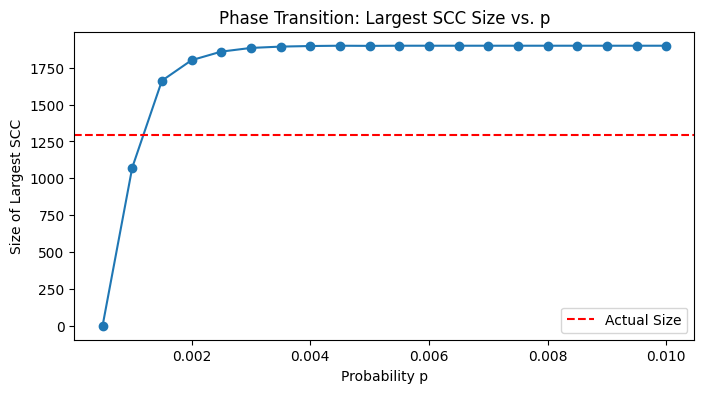

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Let's define a function that, for a given p, generates a directed ER graph
# and returns the size of the largest strongly connected component (SCC).


def largest_scc_size(n, p):
    G_temp = nx.erdos_renyi_graph(n=n, p=p, directed=True)
    sccs = list(nx.strongly_connected_components(G_temp))
    # largest SCC size:
    return max(len(scc) for scc in sccs)


actual_size = max(len(c) for c in nx.strongly_connected_components(G_college))

# We'll fix n based on the CollegeMsg network size (for demonstration).
n_fixed = G_college.number_of_nodes()  # from previous sections

# Let's sample some p values in a range that might show a transition
p_values = np.linspace(0.0005, 0.01, 20)

largest_scc_sizes = []
for p in p_values:
    scc_size = largest_scc_size(n_fixed, p)
    largest_scc_sizes.append(scc_size)

# Plot the results
plt.figure(figsize=(8, 4))
plt.plot(p_values, largest_scc_sizes, marker="o")
plt.axhline(y=actual_size, color="red", linestyle="--", label="Actual Size")
plt.title("Phase Transition: Largest SCC Size vs. p")
plt.xlabel("Probability p")
plt.ylabel("Size of Largest SCC")
plt.legend()
plt.show()

### e. Explanation
1. **Sweeping $ p $:** By iterating through a range of probabilities, we can see how rapidly the largest strongly connected component (SCC) grows.  
2. **Phase Transition:** Expect a sudden jump in the largest SCC if the number of nodes is sufficiently large. This jump indicates the formation of a giant component.
3. **Directed vs. Undirected:** For directed graphs, strong connectivity is a stricter condition than connectivity in undirected graphs. Hence, the threshold for a “giant strongly connected component” can differ from the well-known undirected threshold formulas.
### f. Implications for Real Networks
Real networks (like **CollegeMsg**) often exhibit connectivity well above minimal thresholds:
- **Robustness**: Being above the giant-component threshold typically means the network is robust to random removals of edges/nodes.
- **Efficiency**: Large connected subgraphs allow for efficient communication or information flow.
- **Model Comparisons**: If we observe that real networks are far beyond the threshold, we might guess they’re shaped by mechanisms that favor connectivity (e.g., triadic closure, preferential attachment, etc.).


*(Feel free to add more data points or experiment with different ranges of $ p $.)*
### h. Extensions of Erdős–Rényi Models
- **$ G(n, p) $ vs. $ G(n, M) $:** Some theoretical treatments focus on a fixed number of edges $ M $. The results can often be translated via $ M \approx p \times \binom{n}{2} $ in undirected graphs.
- **Directed vs. Undirected Extensions:** For directed ER graphs, there are separate thresholds for in-degree/out-degree-based connectivity (e.g., strongly vs. weakly connected).
- **Weighted Random Graphs:** Another extension is assigning weights to edges randomly, but still controlling probability distributions.
- **Real-World Adaptations:** Many real networks show high clustering, heavy-tailed distributions, or correlated edges, which ER models do not capture well. This motivates alternative models (e.g., Watts–Strogatz for small-world effects, Barabási–Albert for scale-free).
### Quiz
1. Define the concept of a “giant component” in the context of ER graphs.  
2. What happens around $ p = \frac{1}{n} $ (in the undirected case) with respect to component structure?  
3. Why might real networks be “far” above the giant component threshold?  
4. In a directed ER graph, how might we detect the emergence of a “giant strongly connected component”?  
5. (True/False) Phase transitions are typically less abrupt in small graphs.  
### Activities to Practice
1. **Detecting the Weakly Connected Component (WCC):** Convert the directed network to undirected (using `G.to_undirected()`) and see if the giant component emerges at the same threshold as strong connectivity.
2. **Comparing Different $ p $ Ranges:** Try generating random graphs in a narrower range around $ 1/n $ to see if you can pinpoint the giant component transition.
3. **Mixing Models:** Combine an ER approach with additional rules (like preferential attachment for a subset of nodes) to observe if it “pushes” the network toward giant components more easily.
4. **Experiment:** Vary $ n $ (while scaling $ p $ accordingly) to see how the phase transition becomes sharper (more abrupt) for larger $ n $.

*Answers to the quiz will be provided separately at the end.*  
---
**End of Section 1.3**  
Next, we’ll transition to **Small-World Networks – Watts–Strogatz Model (Section 2)**.


# 2: Small-World Networks – Watts–Strogatz Model
# 2.1: Introduction to Small-World Phenomena
## Overview
In many real-world networks, it is common to observe the "**small-world**" phenomenon. This is characterized by:
- Relatively **short average path lengths** between nodes (often scaling logarithmically or slower with the number of nodes).
- A **high clustering coefficient** compared to a random graph of similar size.

The **Watts–Strogatz (WS)** model captures these two properties by starting with a highly regular ring lattice and then randomly “rewiring” edges with a certain probability. This allows us to transition from a regular lattice (high clustering, large path length) to something closer to an Erdős–Rényi random graph (low clustering, short path length). Along the way, we often find a “sweet spot” where both high clustering and short path lengths coexist, mimicking real networks more closely than pure random models.
### a. Objective
- Understand the underlying principles behind small-world networks.
- Learn how the Watts–Strogatz model generates graphs with both high clustering and relatively short path lengths.
- Compare small-world properties to the **CollegeMsg** dataset and see if/where such a model might fit.
### b. Introduction
Real social networks, biological networks, and technological networks often exhibit the “six degrees of separation” phenomenon, a practical example of the small-world effect. The **Watts–Strogatz** model captures this by:
1. **Starting with a ring lattice** where each node is connected to its $ k $ nearest neighbors.
2. **Randomly rewiring** edges with probability $ \beta $, introducing “shortcuts” across the network.

As $\beta$ grows from 0 to 1, we move from a purely regular structure to a random structure. Somewhere in between, there is a range where the **characteristic path length** is significantly reduced, but the **clustering** remains relatively high.
### c. Characteristic Path Length and Clustering
- **Characteristic Path Length (CPL):** The average shortest path between any two nodes in the network. A smaller CPL means the network is well-connected on a global scale.
- **Clustering Coefficient (CC):** Measures how likely neighbors of a node are to be neighbors themselves. A higher CC indicates more local “cliquishness” or triadic closure.
- **Small-World Regime:** A range of rewiring probability $\beta$ where CPL dramatically decreases from that of a regular lattice, while CC remains relatively high.
### d. Examples/Code (generate a Watts–Strogatz graph & compare with CollegeMsg)
Below, we will:
1. Create a Watts–Strogatz small-world graph using NetworkX.
2. Compare its clustering and average path length to the **CollegeMsg** dataset (converted to undirected for simplicity).


In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------------------------------------------
# 1) Define or load G_college before converting to undirected
#    (Replace this random graph with your actual dataset loading code)
# -------------------------------------------------------------------
# Example: read edge list from a file or create a placeholder
# G_college = nx.read_edgelist('CollegeMsg.txt', create_using=nx.DiGraph())  # <-- if you have the dataset
# For demonstration, here we just use a random directed graph as a placeholder:
G_college = nx.gnp_random_graph(1000, 0.01, directed=True)

# Convert directed graph to undirected for small-world metrics
G_college_undirected = G_college.to_undirected()

# 2) Basic stats for CollegeMsg (undirected):
num_nodes_college = G_college_undirected.number_of_nodes()
num_edges_college = G_college_undirected.number_of_edges()

print("CollegeMsg (Undirected) Stats:")
print(f"Nodes: {num_nodes_college:,d}")
print(f"Edges: {num_edges_college:,d}")

CollegeMsg (Undirected) Stats:
Nodes: 1,000
Edges: 9,864


In [16]:
# 3) Create a Watts–Strogatz graph with n ~ number of nodes from CollegeMsg
# We'll pick k=6 as an example, and rewiring probability beta=0.05
n_ws = num_nodes_college
k_ws = 6  # each node is connected to 6 nearest neighbors (3 on each side in a ring)
beta_ws = 0.05
G_ws = nx.watts_strogatz_graph(n=n_ws, k=k_ws, p=beta_ws)

# 4) Compute average path length (APL) and clustering for both:
cc_college = nx.average_clustering(G_college_undirected)
try:
    apl_college = nx.average_shortest_path_length(G_college_undirected)
except:
    apl_college = None  # In case the graph is not fully connected

cc_ws = nx.average_clustering(G_ws)
apl_ws = nx.average_shortest_path_length(G_ws)

print("\nCollegeMsg (Undirected):")
print(f"Clustering Coefficient (approx): {cc_college:.4f}")
if apl_college:
    print(f"Average Path Length (approx): {apl_college:.4f}")
else:
    print("Average Path Length not computed - Graph might be disconnected.")

print("\nWatts–Strogatz Model:")
print(f"Clustering Coefficient: {cc_ws:.4f}")
print(f"Average Path Length: {apl_ws:.4f}")


CollegeMsg (Undirected):
Clustering Coefficient (approx): 0.0191
Average Path Length (approx): 2.6473

Watts–Strogatz Model:
Clustering Coefficient: 0.5167
Average Path Length: 7.7073


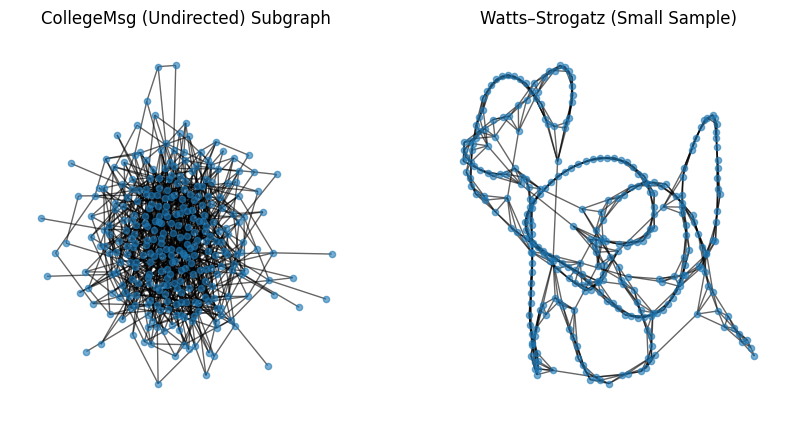

In [17]:
# 5) Visualize a small sample of each network
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sample_nodes_c = list(G_college_undirected.nodes())[
    :300
]  # just picking first 300 for a small subgraph
subG_c = G_college_undirected.subgraph(sample_nodes_c)
nx.draw(subG_c, node_size=20, alpha=0.6)
plt.title("CollegeMsg (Undirected) Subgraph")

plt.subplot(1, 2, 2)
sample_nodes_ws = list(G_ws.nodes())[:300]
subG_ws = G_ws.subgraph(sample_nodes_ws)
nx.draw(subG_ws, node_size=20, alpha=0.6)
plt.title("Watts–Strogatz (Small Sample)")

plt.show()

### e. Explanation
- **Comparison to Real Data:** The WS model might have a high clustering coefficient similar to real networks. However, the average path length in the real dataset might differ if it’s not fully connected or has distinct communities.
- **Rewiring Probability:** Even a small rewiring probability ($\beta$) can drastically reduce path lengths while keeping clustering high. This is the hallmark of a small-world network.
- **Disconnected Components:** If the **CollegeMsg** undirected graph isn’t fully connected, average path length might be infinite for some pairs. In practice, we often restrict path length calculations to the largest connected component.
### f. Local vs. Global Clustering
- **Local Clustering:** The average of the **local** clustering coefficient around each node (NetworkX’s default for `nx.average_clustering`).
- **Global Clustering (Transitivity):** The fraction of possible triangles that actually exist in the entire network.  
- **Insight:** Local clustering measures how nodes form tightly knit groups, while global clustering looks at triadic closure on a network-wide scale.
### g. Practical Activities/Code (visualize path lengths)
**Activity Prompt**:  
1. Vary $\beta$ in a Watts–Strogatz graph from 0.0 to 1.0 in increments (e.g., 0.0, 0.01, 0.1, 0.3, 0.5, 1.0).  
2. For each $\beta$, compute and plot:
   - Clustering coefficient
   - Average path length  
3. Observe where the "small-world" effect is most pronounced.


Text(0, 0.5, 'Average Path Length')

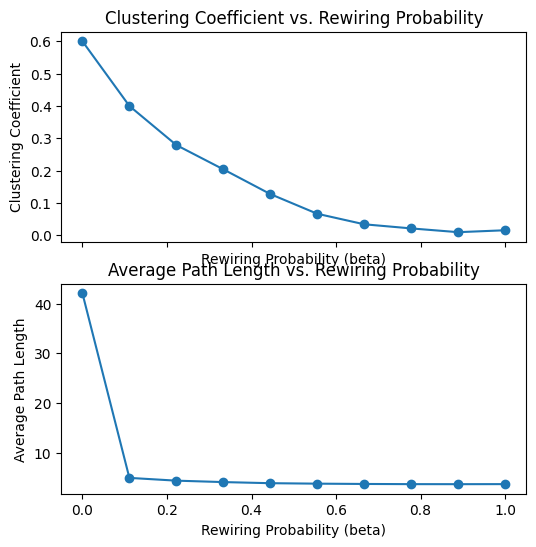

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Practical Activity Starter Code
beta_values = np.linspace(0.0, 1, 10)
cc_vals = []
apl_vals = []

# We'll keep n and k fixed, but vary beta
n_fixed = 500  # smaller for quicker demo
k_fixed = 6

for b in beta_values:
    G_temp = nx.watts_strogatz_graph(n_fixed, k_fixed, b)
    cc_vals.append(nx.average_clustering(G_temp))
    apl_vals.append(nx.average_shortest_path_length(G_temp))

fig, axes = plt.subplots(2, 1, figsize=(6, 6), sharex=True)
ax = axes[0]
ax.plot(beta_values, cc_vals, "-o")
ax.set_title("Clustering Coefficient vs. Rewiring Probability")
ax.set_xlabel("Rewiring Probability (beta)")
ax.set_ylabel("Clustering Coefficient")
ax = axes[1]
ax.plot(beta_values, apl_vals, "-o")
ax.set_title("Average Path Length vs. Rewiring Probability")
ax.set_xlabel("Rewiring Probability (beta)")
ax.set_ylabel("Average Path Length")

In [19]:
# degs_college = [d for n, d in G_college_undirected.degree()]
# degs_ws = [d for n, d in G_ws.degree()]

# fig, axes = plt.subplots(2, 1, figsize=(6, 6))
# ax = axes[0]
# log_log_distribution_plot(degs_college, ax=ax, title="CollegeMsg Degree Distribution")
# ax.set_title("CollegeMsg Degree Distribution")
# ax = axes[1]
# log_log_distribution_plot(degs_ws, ax=ax, title="Watts-Strogatz Degree Distribution")
# ax.set_title("Watts-Strogatz Degree Distribution")
# plt.tight_layout()
# plt.show()

*(After completing the activity, note where clustering drops significantly or path length plummets. That region is typically considered the small-world regime.)*
### h. Relevance to Real-World Networks
- **Social Networks:** Often exhibit high clustering (friend-of-a-friend relationships) and short path lengths (easy to reach others with few intermediaries).
- **Biological Networks:** Certain metabolic or neural networks show small-world properties, optimizing between local specialization and global integration.
- **Technological Networks:** The Internet or power grids may display small-world traits, balancing redundancy with efficiency.

By comparing the metrics from **CollegeMsg** to a Watts–Strogatz model, we can see if the dataset’s clustering and path lengths align more with a small-world network than a purely random or regular structure.
### Quiz
1. What are the two primary distinguishing characteristics of small-world networks?  
2. In the Watts–Strogatz model, what is the role of the rewiring probability ($\beta$)?  
3. How does the clustering coefficient in the WS model compare to an Erdős–Rényi graph with a similar number of nodes/edges?  
4. (True/False) A small $\beta$ typically results in high clustering and relatively large path lengths.  
5. Why might real networks (e.g., CollegeMsg) deviate from the exact structure of the WS model?
### Activities to Practice
1. **Alternative k Values:** Experiment with different values of $ k $ in the WS model. How does that affect path length and clustering?
2. **Compare to Other Real Networks:** If you have another dataset, try computing the same metrics (clustering, average path length) and see if it’s “small-world.”
3. **Directed Implementation:** Research how to implement a directed small-world model. Compare the differences in clustering/path length definitions and outcomes.

---
# 2.2: Rewiring Probability and Network Properties
## Overview
One of the central features of the Watts–Strogatz model is the **rewiring probability** $\beta$. As we vary $\beta$, we observe how clustering and path length transition between:
- **$\beta = 0$**: A regular ring lattice with high clustering and large path lengths.
- **$\beta = 1$**: A random network (similar to Erdős–Rényi) with low clustering and shorter path lengths.
### a. Objective
- Examine in more depth how **rewiring** influences small-world properties.
- Demonstrate how to **simulate** multiple rewiring probabilities and generate empirical results.
- Compare these simulated outcomes to the **CollegeMsg** network to see if real data hints at a certain range of $\beta$.
### b. Introduction
Rewiring edges in a ring lattice:
1. **Maintains** the number of edges and basic node degrees ($k$).
2. **Destroys** local structure in a controlled way. Even a small fraction of shortcuts can drastically reduce path lengths.
3. **Preserves** some local clustering until $\beta$ grows large.

By systematically increasing $\beta$, we can track metrics like the clustering coefficient, average path length, diameter, or even community structure.
### c. Impact of Rewiring Probability on Clustering & Distance
- **Clustering vs. $\beta$:** Remains high for small $\beta$, but starts to decline as more edges lose their local connections.
- **Characteristic Path Length vs. $\beta$:** Drops quickly, even if $\beta$ is small, because a few long-range shortcuts can significantly decrease distances between nodes.
- **Trade-Off:** There's often a region of $\beta$ values that yield a good balance between short path lengths and high clustering—this is the core of the "small-world" regime.
### d. Examples/Code (run simulations across different rewiring probabilities)
We can replicate the process of generating multiple WS graphs with varying $\beta$ and collecting metrics:


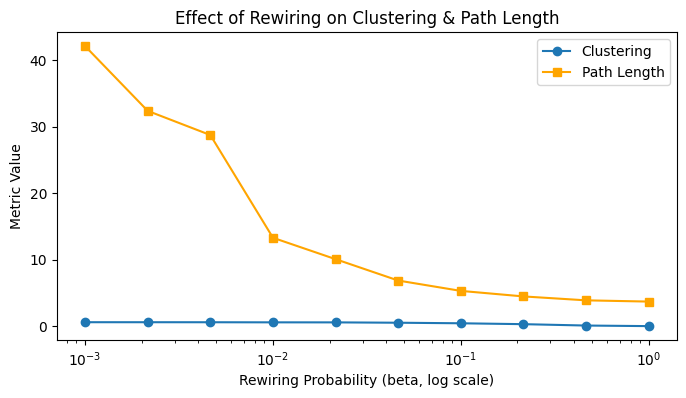

In [20]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


# Let's define a helper function for generating a WS graph
# and returning a tuple of (clustering_coefficient, average_path_length).
def ws_metrics(n, k, beta):
    G_temp = nx.watts_strogatz_graph(n, k, beta)
    cc = nx.average_clustering(G_temp)
    apl = nx.average_shortest_path_length(G_temp)
    return cc, apl


n_sim = 500  # smaller for demonstration
k_sim = 6
betas = np.logspace(-3, 0, 10)  # from ~0.001 to 1.0 on a log scale
cc_vals = []
apl_vals = []

for b in betas:
    cc_b, apl_b = ws_metrics(n_sim, k_sim, b)
    cc_vals.append(cc_b)
    apl_vals.append(apl_b)

plt.figure(figsize=(8, 4))

# Plot clustering
plt.plot(betas, cc_vals, "o-", label="Clustering")
# Plot path length
plt.plot(betas, apl_vals, "s-", label="Path Length", color="orange")

plt.xscale("log")
plt.xlabel("Rewiring Probability (beta, log scale)")
plt.ylabel("Metric Value")
plt.title("Effect of Rewiring on Clustering & Path Length")
plt.legend()
plt.show()


### e. Explanation
- **Logarithmic Scale:** We used $\log$ scale on the x-axis to capture variations at very small $\beta$.
- **Rapid Drop in Path Length:** Even for small rewiring probabilities, we see a significant decrease in path length.
- **Clustering Decay:** Clustering remains high until $\beta$ reaches a threshold where local structure is significantly disrupted.
### f. Observing Small-World Effects in CollegeMsg
To see if **CollegeMsg** might fit into a small-world pattern:
- Compute its clustering coefficient and average path length (on the largest connected component if needed).
- Identify a $\beta$ in the WS model that produces similar values for $(\text{CC}, \text{APL})$.
- This approach is heuristic but can indicate if **CollegeMsg** is more small-world or more random.
### g. Practical Activities/Code (plot clustering vs. rewiring)
**Activity Prompt**:  
1. Use the above simulation approach, but store the entire distribution of path lengths (not just the average).  
2. Compare how the distribution changes as you move $\beta$ from 0.0 to 1.0.  
3. Plot both the “histogram of path lengths” and “histogram of clustering per node” for a few representative $\beta$ values.

*(No starter code provided here — be creative!)*
### h. Limitations of the Watts–Strogatz Model
- **Fixed Degree:** Each node retains the same degree ($k$) except for rewired edges, which may slightly alter degrees.
- **No Heavy-Tailed Distributions:** Real networks can have hubs or power-law-like distributions, whereas WS graphs are still mostly regular in degrees.
- **No Directed/Weighted Extensions in the Basic Form:** The basic WS model is undirected and unweighted. Real-world networks often have directionality and varying edge weights.
- **Local Rewiring Only:** Some real networks have more global processes driving connectivity, which WS does not capture directly.
### Quiz
1. How does the rewiring probability $\beta$ control the transition from a lattice to a random graph in the WS model?  
2. Why does even a small $\beta$ drastically reduce path lengths?  
3. (True/False) The WS model inherently produces a power-law degree distribution.  
4. What is a main difference between the WS model’s approach to clustering and the clustering observed in real networks?  
5. Suggest one reason you might see a mismatch between a WS-simulated network and a real dataset like **CollegeMsg**.
### Activities to Practice
1. **Directed Variation:** Attempt to create a custom “directed small-world” model by rewiring edges with direction. Evaluate how that changes average path length and clustering.
2. **Node Removal:** Test the robustness of a WS network vs. random node removal. Is there a difference in how quickly path length increases or clustering decreases?
3. **Comparative Plot:** On a single chart, plot both the WS and **CollegeMsg** $(\text{CC}, \text{APL})$. Can you find a $\beta$ that gets close to the real data’s metrics?

*(Answers to the quiz will come at the end.)*
---
# 2.3: Applications of Small-World Models
## Overview
Small-world networks are found in numerous real-world systems. This section looks at:
- Diverse examples beyond social interactions (e.g., biological, technological).
- Mapping real data (like **CollegeMsg**) to a small-world structure for deeper analysis.
- Evaluating the **small-world hypothesis**: Are short path lengths + high clustering truly ubiquitous?
### a. Objective
- Explore **real-world examples** of small-world networks.
- Demonstrate a method for **embedding** or **mapping** real network edges onto a small-world template.
- Use computational experiments to test whether a real dataset, like **CollegeMsg**, follows key small-world criteria.
### b. Introduction
Networks such as:
- **Biological:** Neural networks in the brain, metabolic networks.
- **Technological:** Power grids, the World Wide Web, airline routes.
- **Social:** Collaboration networks, friendship or follower relationships.
often exhibit small-world features. By examining data from these domains, we can see if the pattern of high clustering and short path lengths holds, and how it evolves over time or under perturbations.
### c. Real-World Examples: Social, Biological, Technological Networks
1. **Social:** Milgram’s “Six Degrees” experiment. Online social media often replicate these results at a global scale.  
2. **Biological:** C. elegans neural network. Study by Watts and Strogatz showed short path lengths and high clustering.  
3. **Technological:** Power grids, with local connectivity (regional clusters) and transmission lines that act like “long-range” shortcuts, drastically reducing path lengths.
### d. Examples/Code (mapping real edges from CollegeMsg onto a small-world structure)
Below, we demonstrate a conceptual approach:  
1. **Sort** CollegeMsg nodes by a chosen feature (e.g., total degree).  
2. **Place** them on a ring in that sorted order.  
3. **Observe** if edges primarily connect “nearby” nodes or if there are many “long jumps.”  
4. We can measure how many edges would be “rewirings” if we treat the ring as a baseline structure.


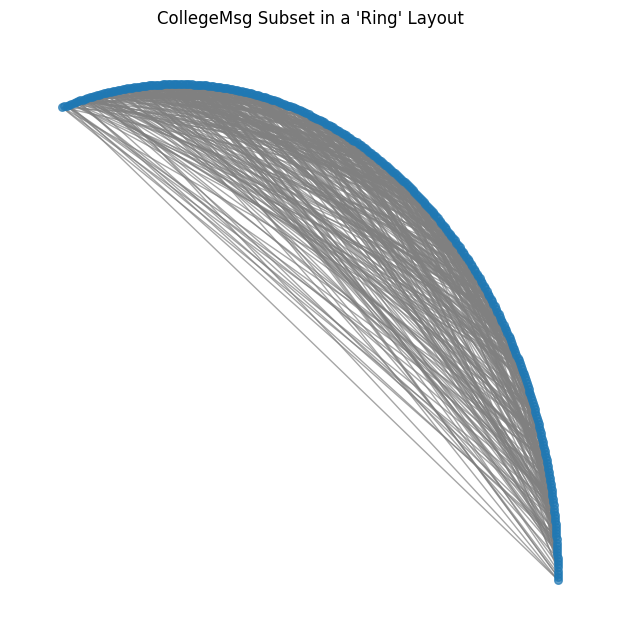

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

# Suppose we use out-degree as our sorting criterion:
node_degs = [(node, G_college.out_degree(node)) for node in G_college.nodes()]
sorted_nodes = [nd[0] for nd in sorted(node_degs, key=lambda x: x[1])]

# We create a 'ring position' dictionary
pos_ring = {}
n_total = len(sorted_nodes)
for i, nd in enumerate(sorted_nodes):
    # place them in a circular layout
    angle = 2.0 * 3.14159 * (i / n_total)
    pos_ring[nd] = (np.cos(angle), np.sin(angle))

# We can then draw a subgraph with these positions:
sub_nodes = sorted_nodes[:300]  # small subset
subG = G_college.subgraph(sub_nodes).to_undirected()

plt.figure(figsize=(6, 6))
nx.draw(
    subG,
    pos={nd: pos_ring[nd] for nd in sub_nodes},
    node_size=30,
    alpha=0.7,
    edge_color="gray",
)
plt.title("CollegeMsg Subset in a 'Ring' Layout")
plt.show()

*(This visualization is purely exploratory: it helps see if edges predominantly connect nodes that are close in the ring, or if there are many cross-ring shortcuts, akin to rewiring.)*
### e. Explanation
- **Ring Layout Analogy:** If most edges connect neighbors in the ring, the network might resemble a low-$\beta$ Watts–Strogatz. If many edges jump across distant parts of the ring, that’s more like high $\beta$.  
- **Mapping Approach:** This method is heuristic; it doesn’t guarantee an exact match to the WS model, but it helps visualize whether the network might be “locally clustered” with random long-range shortcuts.
### f. Testing Small-World Hypothesis on the Dataset
1. **Compute Clustering & Path Length:** Evaluate whether **CollegeMsg** (or its largest connected component) displays short average distances and high local clustering.  
2. **Rewiring Perspective:** Compare an equivalent WS graph with a rewiring probability $\beta^*$ that yields similar $(\text{APL}, \text{CC})$.  
3. **Interpretation:** If the dataset’s metrics fall in the small-world range, we can say it exhibits small-world properties. However, many real-world nuances (like degree distributions, community structures) might complicate a direct classification.
### g. Practical Activities/Code (compute average path length, clustering)
**Activity Prompt**:  
- For the largest connected component in **CollegeMsg** (undirected view), compute the diameter (the maximum shortest path length).
- Compare that diameter to that of an equivalent WS model (same number of nodes and edges).
- Note: If the real network has multiple components, consider only the largest or see if the diameter is infinite.


In [22]:
# Starter code snippet
Gc = max(nx.connected_components(G_college_undirected), key=len)
G_lcc = G_college_undirected.subgraph(Gc).copy()

print(f"Largest connected component size: {G_lcc.number_of_nodes()}")

# Compute diameter (can be expensive for large graphs, so be cautious)
try:
    diameter_college = nx.diameter(G_lcc)
    print(f"CollegeMsg LCC Diameter:            {diameter_college}")
except:
    print("Could not compute diameter, might be large or memory-intensive")

# Compare to a WS model with the same n, similar edges
n_ws_cmp = G_lcc.number_of_nodes()
k_ws_cmp = int(
    2 * G_lcc.number_of_edges() / G_lcc.number_of_nodes()
)  # rough avg degree
G_ws_cmp = nx.watts_strogatz_graph(n_ws_cmp, k_ws_cmp, 0.1)
print(f"WS diameter:                        {nx.diameter(G_ws_cmp)}")

print(f"ER diameter:                        {nx.diameter(G_er)}")

Largest connected component size: 1000
CollegeMsg LCC Diameter:            4
WS diameter:                        5
ER diameter:                        6


### h. Further Research Directions
- **Time-Varying Small-World Networks:** Observe how clustering/path lengths evolve over time in dynamic datasets like CollegeMsg if timestamps are considered.
- **Extensions to Weighted & Directed Edges:** The standard WS model is unweighted and undirected. Real data often need modifications or entirely new models to accommodate directionality and edge weights.
- **Community Structures & Overlapping Clusters:** Many real small-world networks also exhibit robust community structures, which is beyond the scope of basic WS modeling.

*(For deeper exploration, see the original paper by Watts and Strogatz, 1998.)*
### Quiz
1. Name two real-world systems (besides social networks) that have been modeled using small-world principles.  
2. How can you visually inspect whether a network has many “long-range” edges or mostly local edges using a ring layout?  
3. Why might computing the diameter of large networks be computationally expensive?  
4. (True/False) The Watts–Strogatz model can perfectly capture directed, weighted edges in its original formulation.  
5. If a dataset has very high clustering and short path lengths, is that conclusive proof it’s a small-world network?
### Activities to Practice
1. **Advanced Visualization:** Use a chord diagram or circle layout to highlight “shortcut” edges in **CollegeMsg**.
2. **Temporal Analysis:** If you have the timestamps from CollegeMsg, try partitioning the data by month to see if the network transitions from a sparser structure to a denser, small-world structure over time.
3. **Mixing $\beta$:** In real networks, the rewiring might not be uniform. Some edges might have higher probability of being shortcuts than others. Experiment by assigning different $\beta$ values for different parts of the network.

---
**End of Section 2**  
Next, we’ll move on to **Scale-Free Networks – Barabási–Albert Model (Section 3)**.  


# 3: Scale-Free Networks – Barabási–Albert Model
# 3.1: Growth and Preferential Attachment
## Overview
In this section, we introduce the **Barabási–Albert (BA)** model, which is often used to explain how **scale-free** degree distributions arise in real networks. The BA model is built on two key assumptions:

1. **Growth**: Networks grow by adding new nodes over time.
2. **Preferential Attachment**: New nodes are more likely to connect to existing nodes with higher degrees (the “rich get richer” effect).

We will:
- Understand the mechanics of the BA model.
- Generate BA networks using NetworkX.
- Compare degree distributions with the real **CollegeMsg** dataset.
### a. Objective
- Explain why many networks exhibit heavy-tailed degree distributions.
- Demonstrate how **preferential attachment** creates high-degree hubs in the network.
- Compare the generated BA network to real-world data from **CollegeMsg** to see how well it matches real degree distributions.
### b. Introduction
**Scale-free** networks are characterized by a power-law degree distribution, meaning the proportion of nodes with degree $ k $ is proportional to $ k^{-\gamma} $ for some exponent $\gamma$. Real-world networks—like the World Wide Web, citation networks, some social networks—often exhibit this heavy-tailed structure.

**Barabási–Albert Model** Steps:
1. **Start** with a small “seed” network of $ m_0 $ nodes (fully connected or partially connected).
2. **Add** new nodes one by one. Each new node attaches to $ m $ existing nodes with a probability proportional to their current degrees:
   \[
   P(\text{connect to node } i) = \frac{d_i}{\sum_j d_j},
   \]
   where $ d_i $ is the degree of node $ i $.

This process naturally leads to some nodes acquiring disproportionately large degrees over time, forming **hubs**.
### c. Concept of Preferential Attachment
- **High-degree nodes** attract more incoming edges, which further increases their degree.
- **‘Rich-get-richer’** or **Yule process** effect: it’s reminiscent of how wealth distribution or citation networks grow over time.
- **Mathematical Consequence**: This iterative mechanism leads to a power-law-like distribution for degrees.
### d. Examples/Code (generate a BA model, compare to CollegeMsg degree distribution)
Below, we show how to:
1. Generate a BA network with $ n $ nodes and parameter $ m $.
2. Compare the resulting degree distribution to that of the **CollegeMsg** graph.


In [23]:
edge_list = []
with open(file_path, "r") as f:
    for line in f:
        # The file format is typically: u v t
        # We'll ignore t for a static representation.
        parts = line.strip().split()
        if len(parts) == 3:
            u, v, _ = parts
            edge_list.append((int(u), int(v)))

# Create a directed graph from the edges
G_college = nx.DiGraph()
G_college.add_edges_from(edge_list)

# Step 2: Basic Stats for the CollegeMsg Graph
num_nodes_college = G_college.number_of_nodes()
num_edges_college = G_college.number_of_edges()
print("CollegeMsg Graph:")
print(f"Number of Nodes: {num_nodes_college:6,}")
print(f"Number of Edges: {num_edges_college:6,}")

CollegeMsg Graph:
Number of Nodes:  1,899
Number of Edges: 20,296


CollegeMsg (Undirected) Stats:
Nodes: 1899
Edges: 13838
Estimated BA parameter m based on average degree: 7


/var/folders/xy/6n3m38qx423b_gjbx89x02b40000gn/T/ipykernel_69863/438044091.py:14: RuntimeWarning: divide by zero encountered in log10
  return np.log10(x), np.log10(y)


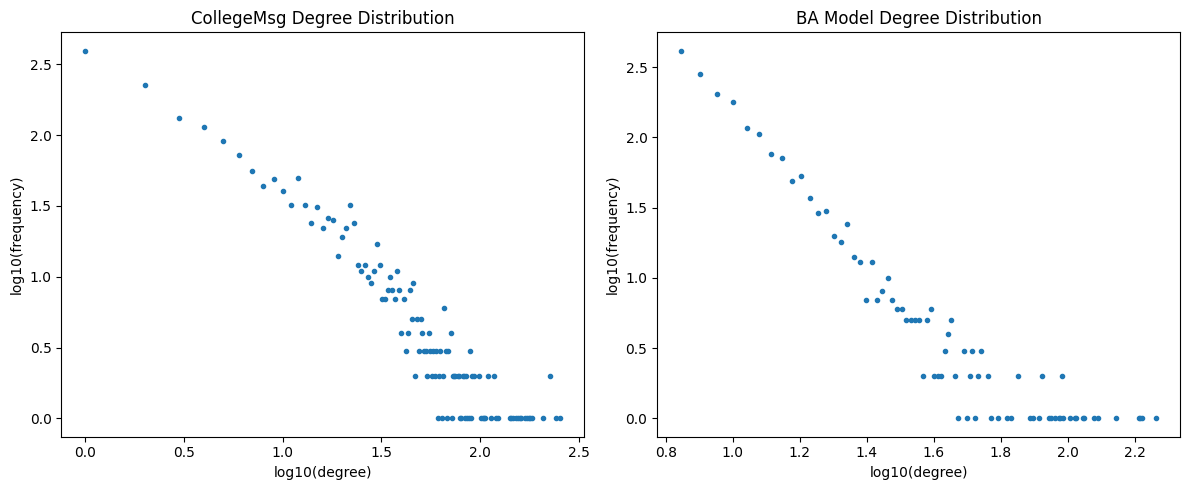

In [24]:
import networkx as nx
import matplotlib.pyplot as plt

# Assume we have G_college from the CollegeMsg dataset (directed).
# Convert to undirected or consider in-degree / out-degree separately.
G_college_undirected = G_college.to_undirected()

num_nodes_college = G_college_undirected.number_of_nodes()
num_edges_college = G_college_undirected.number_of_edges()

print("CollegeMsg (Undirected) Stats:")
print("Nodes:", num_nodes_college)
print("Edges:", num_edges_college)

# We'll estimate m using average degree / 2 for undirected
avg_degree = (2 * num_edges_college) / num_nodes_college
m_est = int(avg_degree / 2) if avg_degree > 2 else 2  # at least 2

print(f"Estimated BA parameter m based on average degree: {m_est}")

# Generate a Barabási–Albert graph
G_ba = nx.barabasi_albert_graph(n=num_nodes_college, m=m_est)

# Compare Degree Distributions
deg_college = [G_college_undirected.degree(n) for n in G_college_undirected.nodes()]
deg_ba = [G_ba.degree(n) for n in G_ba.nodes()]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)

log_log_distribution_plot(deg_college, title="CollegeMsg Degree Distribution")
plt.title("CollegeMsg Degree Distribution")

plt.subplot(1, 2, 2)
log_log_distribution_plot(deg_ba, title="BA Model Degree Distribution")
plt.title("BA Model Degree Distribution")

plt.tight_layout()
plt.show()

/var/folders/xy/6n3m38qx423b_gjbx89x02b40000gn/T/ipykernel_69863/438044091.py:14: RuntimeWarning: divide by zero encountered in log10
  return np.log10(x), np.log10(y)


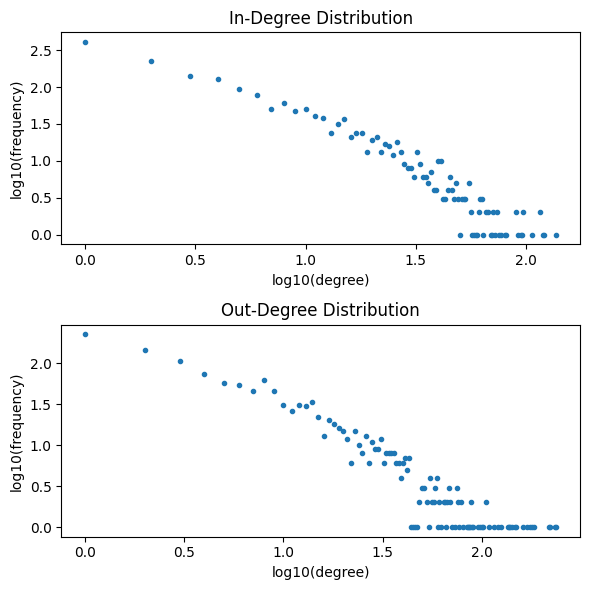

In [25]:
degrees_in = [G_college.in_degree(n) for n in G_college.nodes()]
degrees_out = [G_college.out_degree(n) for n in G_college.nodes()]
fig, axes = plt.subplots(2, 1, figsize=(6, 6))
ax = axes[0]
log_log_distribution_plot(degrees_in, ax=ax, title="In-Degree Distribution")
ax.set_title("In-Degree Distribution")
ax = axes[1]
log_log_distribution_plot(degrees_out, ax=ax, title="Out-Degree Distribution")
ax.set_title("Out-Degree Distribution")
plt.tight_layout()
plt.show()

### e. Explanation
- **Model Assumptions:** The BA model assumes continuous growth and that new links favor high-degree nodes.  
- **Degree Distributions:** The resulting histogram from a BA network often shows more nodes with higher degrees compared to an Erdős–Rényi graph (which is often closer to a Poisson-like distribution).
- **Real Data Check:** Whether a real network truly follows a power-law is a matter of empirical testing, often requiring large samples and statistical fits (e.g., using maximum likelihood estimation).
### f. Key Parameters: m (edges per new node)
- **$ m $** largely determines the average degree of the network; bigger $ m $ means more connections per newly introduced node.
- **Network Growth:** The total number of edges grows linearly with $ n \cdot m $ once the initial seed is set.
- **Influence on Hubs:** A larger $ m $ might produce more well-connected hubs but can also homogenize the degree distribution (less extreme).
### g. Practical Activities/Code (visualize growth over time)
**Activity Prompt**:
1. Write a function that simulates the BA process **step by step**, keeping track of the largest hub at each addition.
2. Plot how the maximum degree evolves as the network grows.


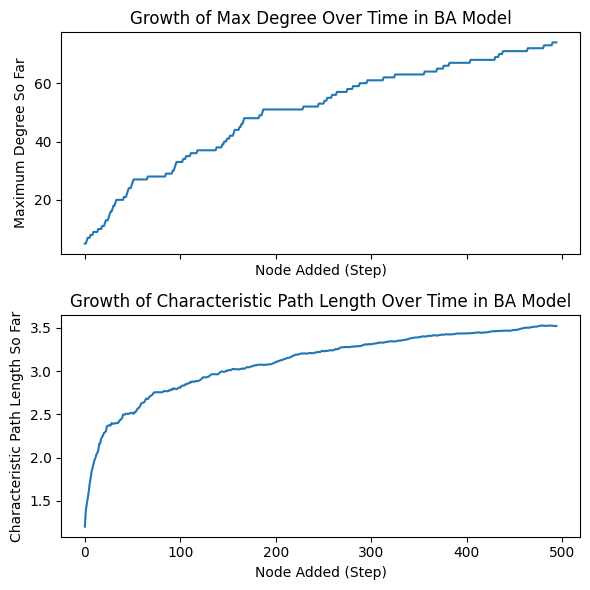

In [26]:
import networkx as nx
import random  # <-- Import random to fix the NameError
import matplotlib.pyplot as plt


def simulate_ba_growth(n, m, initial_nodes=5):
    # Start with a small initial complete graph of size 'initial_nodes'
    G_init = nx.complete_graph(initial_nodes)
    # Track node index:
    current_index = initial_nodes
    # We can store the graph in a NetworkX object or do it manually

    # We'll convert to a Graph
    BA_G = nx.Graph()
    BA_G.add_edges_from(G_init.edges())

    # Add new nodes
    max_degs = []
    cpl_values = []  # characteristic path length
    for new_node in range(initial_nodes, n):
        # Calculate probabilities
        degrees_sum = sum(dict(BA_G.degree()).values())
        targets = set()

        # Attach 'm' edges with preferential attachment
        while len(targets) < m:
            # Weighted random choice
            for node, deg in BA_G.degree():
                # Probability of attaching to 'node'
                p_attach = deg / degrees_sum
                # Try a random event
                if len(targets) < m and (random.random() < p_attach):
                    targets.add(node)
            # This approach can be refined for efficiency

        # Add the new node
        BA_G.add_node(new_node)
        for t in targets:
            BA_G.add_edge(new_node, t)

        max_degs.append(max(dict(BA_G.degree()).values()))
        cpl = nx.average_shortest_path_length(BA_G)
        cpl_values.append(cpl)

    return BA_G, max_degs, cpl_values


# Example usage
n_demo = 500
m_demo = 2
G_ba_demo, max_degs_demo, cpl_values_demo = simulate_ba_growth(n_demo, m_demo)

fig, axes = plt.subplots(2, 1, figsize=(6, 6), sharex=True)
ax = axes[0]
ax.plot(
    range(len(max_degs_demo)),
    max_degs_demo,
    "-",
)
ax.set_title("Growth of Max Degree Over Time in BA Model")
ax.set_xlabel("Node Added (Step)")
ax.set_ylabel("Maximum Degree So Far")
ax = axes[1]
plt.plot(range(len(cpl_values_demo)), cpl_values_demo, "-")
ax.set_title("Growth of Characteristic Path Length Over Time in BA Model")
ax.set_xlabel("Node Added (Step)")
ax.set_ylabel("Characteristic Path Length So Far")
plt.tight_layout()
plt.show()

### h. Historical and Biological Context
- **Origins:** The Barabási–Albert model was proposed in 1999 to explain the heavy-tailed degree distributions observed on the World Wide Web.
- **Biological Networks:** Metabolic and protein-interaction networks also display scale-free properties, suggesting a form of preferential attachment (e.g., proteins that already have many connections may be more likely to gain new ones).
- **Sociological Models:** In social networks, “popular” or “well-known” individuals tend to attract more connections, resonating with BA’s mechanism.

By applying this model, we gain insight into why hubs form and how networks achieve scale-free topologies over time.
### Quiz
1. What are the two main assumptions in the Barabási–Albert model that lead to a scale-free network?  
2. (True/False) A BA network’s degree distribution is approximately Poisson.  
3. Give an intuitive explanation for **preferential attachment**.  
4. What is the role of the parameter $ m $ in a BA model?  
5. Name one real-world example (beyond social networks) where a scale-free structure has been observed.
### Activities to Practice
1. **Compare Fitted Power-Law:** Use a library (e.g., `powerlaw` in Python) to fit a power-law to both the BA network and the **CollegeMsg** degree distribution. Observe how well each fits.
2. **Experiment with Different Seeds:** See if changing the initial seed (the small complete graph of size $ m_0 $) affects the final degree distribution.
3. **Directed Variation:** Try a directed version of preferential attachment. Does in-degree or out-degree distribution remain scale-free?

*(Answers will be provided at the end.)*
---
# 3.2: Degree Distribution and Hubs
## Overview
In scale-free networks, a small number of nodes (often called **hubs**) can have extremely high degrees, dominating the network’s connectivity. This section focuses on:
- Identifying power-law distributions in data.
- Understanding how hubs arise and their implications on network robustness or fragility.
- Examining the **CollegeMsg** dataset to find top “hub” nodes and compare them to the BA model.
### a. Objective
- Learn to identify and visualize power-law degree distributions (e.g., on a log-log plot).
- Investigate the role of hubs in network connectivity and resilience.
- Compare the biggest hubs in **CollegeMsg** with those in a BA model.
### b. Introduction
**Power Law Distribution** is generally represented as:
\[
P(k) \sim k^{-\alpha},
\]
for $ k \geq k_{\min} $. On a **log-log** plot, a power law appears as a straight line. In real networks, you may only see this behavior over a certain range of $ k $ values, leading to a variety of fits (e.g., truncated power law, log-normal, etc.).

**Hubs** in a power-law network:
- Are significantly more connected than the average node.
- Greatly influence dynamics (e.g., information spread, network resilience).
### c. Power Law Distribution
- **Heavy Tail:** A significant fraction of nodes have degrees much larger than the mean.
- **Scale-Invariance:** The distribution’s shape looks similar across different scales of $ k $.
- **Comparison to Other Distributions:** Contrasts with the Poisson-like distribution in an ER graph or the fairly uniform degree distribution of a WS ring-lattice.
### d. Examples/Code (fit a power law to CollegeMsg’s degree distribution)
Below, we demonstrate:
1. Extracting the degree distribution of **CollegeMsg** (undirected).
2. Using an external library (optional) or a simple approach to do a rough fit for a power-law exponent.
3. Plotting the distribution on a log-log scale.


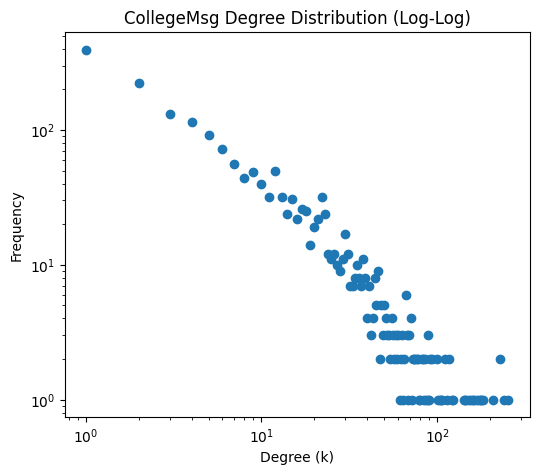

Estimated power-law exponent alpha (rough): 1.3339325382630751


In [27]:
import matplotlib.pyplot as plt
import numpy as np

# 1) Degree distribution
degrees_college = [G_college_undirected.degree(n) for n in G_college_undirected.nodes()]
counts, bin_edges = np.histogram(degrees_college, bins=range(max(degrees_college) + 1))
# We'll avoid bins with zero count

# 2) Simple approach to visualize on a log-log scale
k_vals = np.array(bin_edges[:-1])
counts_nonzero = counts[counts > 0]
k_vals_nonzero = k_vals[counts > 0]

plt.figure(figsize=(6, 5))
plt.loglog(k_vals_nonzero, counts_nonzero, marker="o", linestyle="None")
plt.title("CollegeMsg Degree Distribution (Log-Log)")
plt.xlabel("Degree (k)")
plt.ylabel("Frequency")
plt.show()

# Optional: Rough estimate of alpha using linear regression on log-log
log_k = np.log(k_vals_nonzero)
log_freq = np.log(counts_nonzero)
slope, intercept = np.polyfit(log_k, log_freq, 1)
alpha_est = -slope  # in a power law freq ~ k^-alpha

print("Estimated power-law exponent alpha (rough):", alpha_est)

### e. Explanation
- **Log-Log Plot:** Helps reveal whether the tail follows a line (suggesting power-law).  
- **Fitting Cautions:** Real networks might deviate from a perfect power-law. We often see “cut-offs” due to finite-size effects, or the distribution might better match a log-normal or stretched-exponential.
- **Interpretation:** If the slope is around 2–3, it’s often considered typical for many real scale-free networks.
### f. Identifying Hubs in the Dataset
Hubs are the nodes with the highest degree. They can be crucial for:
- **Spreading processes** (e.g., epidemics, information dissemination).
- **Robustness**: Removing a hub can fragment the network more severely than removing an average node.

**Activity**: Find the top 5 nodes in **CollegeMsg** by degree and compare their degrees to the top 5 nodes in a BA network of similar size.


In [28]:
# Sample activity code snippet
sorted_nodes_by_degree = sorted(
    G_college_undirected.nodes(),
    key=lambda x: G_college_undirected.degree(x),
    reverse=True,
)
top_5_college = sorted_nodes_by_degree[:5]
print("Top 5 Hubs in CollegeMsg (Undirected):")
for nd in top_5_college:
    print(nd, "Degree:", G_college_undirected.degree(nd))

# For a BA graph, let's reuse G_ba or create a new one
sorted_nodes_ba = sorted(G_ba.nodes(), key=lambda x: G_ba.degree(x), reverse=True)
top_5_ba = sorted_nodes_ba[:5]
print("\nTop 5 Hubs in BA model:")
for nd in top_5_ba:
    print(nd, "Degree:", G_ba.degree(nd))

Top 5 Hubs in CollegeMsg (Undirected):
103 Degree: 255
9 Degree: 241
105 Degree: 227
400 Degree: 227
32 Degree: 207

Top 5 Hubs in BA model:
0 Degree: 184
10 Degree: 167
9 Degree: 165
8 Degree: 164
11 Degree: 140


### g. Practical Activities/Code (plot rank-degree, compare to BA model)
**Activity Prompt**:
- Create a **rank-degree plot** for both CollegeMsg and the BA network. Rank each node by its degree in descending order, then plot degree vs. rank on a log-log scale.  
- Observe if one or both follow a power-law slope, or if they diverge.  
### h. Robustness vs. Fragility in Scale-Free Networks
- **Robustness to Random Failures**: Removing random nodes often leaves the network largely connected, because most nodes are not hubs.
- **Fragility to Targeted Attacks**: Removing hubs can dramatically increase path lengths or even disconnect the network.  
- **Relevance to Real Networks**: Understanding hub vulnerability is crucial in designing resilient systems or controlling epidemics that might spread through key hubs.
### Quiz
1. What shape does a power-law distribution typically show on a log-log plot?  
2. Why do “hubs” significantly affect network connectivity in a scale-free network?  
3. (True/False) All real-world networks strictly follow a perfect power-law distribution.  
4. What is the basic difference between a rank-degree plot and a histogram-based approach to visualizing degrees?  
5. Name one potential advantage and one potential disadvantage of having a hub-based network structure.
### Activities to Practice
1. **Targeted Node Removal:** Programmatically remove the top 1%, 5%, and 10% highest-degree nodes from **CollegeMsg**. Compare how the size of the largest connected component changes.
2. **Log-Binning:** Apply log-binning techniques to the degree distribution to get a smoother curve on the log-log plot. Compare your results to the un-binned histogram.
3. **Hubs Over Time:** If you have temporal data (e.g., monthly slices), see if the top hubs remain the same or shift as new edges appear.

*(Answers to quizzes will be provided at the end.)*
---
# 3.3: Extensions and Variations of the Barabási–Albert Model
## Overview
While the basic Barabási–Albert model explains the emergence of scale-free patterns through preferential attachment, many **real networks** show additional complexities:
- Weighted edges
- Fitness (or attractiveness) models
- Community structures
- Time-varying or multi-layer interactions

This section explores **extensions** to the BA model that address some of these real-world aspects.
### a. Objective
- Understand key modifications to the BA model that account for weights, node fitness, or other complexities.
- See how adding such features can yield more realistic networks that match observed behaviors.
- Examine how community detection might reveal hidden structures in scale-free networks like **CollegeMsg**.
### b. Introduction
**Weighted BA models** add intensity or capacity to edges, reflecting that some links are stronger than others.  
**Fitness Models** propose that nodes have an intrinsic “fitness” that affects the probability of attracting new edges, not just their current degree.  
**Community Structures** might arise in scale-free networks if certain subsets of nodes preferentially attach among themselves.
### c. Adding Weights or Fitness Models
1. **Weighted BA:** Each new edge (u → v) may carry a weight that depends on v’s degree or other factors. Over time, heavily weighted edges can create sub-hubs within the network.
2. **Node Fitness:** Suppose each node $ i $ has a fitness value $\eta_i$. Then:
   \[
   P(\text{connect to } i) \propto \eta_i \cdot d_i.
   \]
   This can cause “less connected” but highly “fit” nodes to still gain edges at a faster rate.


In [29]:
# Example: A simple variant of BA where each node i has random "fitness" from a distribution.
import random
import networkx as nx


def fitness_ba_graph(n, m):
    # Fitness array
    fitness = [random.random() for _ in range(n)]

    # Start with m nodes fully connected
    G_init = nx.complete_graph(m)
    G = nx.Graph()
    G.add_nodes_from(G_init.nodes())
    G.add_edges_from(G_init.edges())

    # For convenience, label the initial nodes 0..m-1
    for new_node in range(m, n):
        # Calculate attachment probabilities with fitness
        degrees_sum = 0
        for node in G.nodes():
            degrees_sum += fitness[node] * G.degree(node)

        chosen = set()
        while len(chosen) < m:
            for node in list(G.nodes()):
                p_attach = (
                    (fitness[node] * G.degree(node)) / degrees_sum
                    if degrees_sum > 0
                    else 0
                )
                if (
                    random.random() < p_attach
                    and node not in chosen
                    and node != new_node
                ):
                    chosen.add(node)
                if len(chosen) == m:
                    break

        G.add_node(new_node)
        for c in chosen:
            G.add_edge(new_node, c)
    return G


# Create a small fitness-based BA graph
n_fit = 200
m_fit = 3
G_fit_ba = fitness_ba_graph(n_fit, m_fit)

print("Fitness-based BA graph created:")
print("Nodes:", G_fit_ba.number_of_nodes())
print("Edges:", G_fit_ba.number_of_edges())

Fitness-based BA graph created:
Nodes: 200
Edges: 594


*(This is a demonstrative approach. More sophisticated methods exist to integrate fitness into the BA model efficiently.)*
### e. Explanation
- **Fitness Factor:** Allows a node with fewer connections but higher intrinsic fitness to occasionally outcompete a more established node with lower fitness.
- **Result:** The degree distribution may still be scale-free, but with different exponents or multiple “elite” hubs.
- **Complexity in Real Networks:** Weighted/fitted models can capture phenomena like user popularity vs. content quality in social platforms, or species adaptability in ecological networks.
### f. Community Structures in Scale-Free Networks
- **Communities** (or modules/clusters) are subsets of nodes more densely connected internally.
- **Scale-Free + Community**: Many real networks combine power-law degree distributions with distinct community partitions (e.g., research clusters in co-authorship networks).
- **Detection**: Techniques like **Louvain**, **Girvan–Newman**, or **Infomap** can help identify communities even in large scale-free graphs.
### g. Practical Activities/Code (detect and visualize communities in CollegeMsg)
**Activity Prompt**:
- Convert **CollegeMsg** (undirected) into a manageable size (sample or giant component).
- Use a community detection algorithm (e.g., `nx.algorithms.community.greedy_modularity_communities` in NetworkX).
- Visualize the resulting clusters and see if any align with hub nodes.
### h. Real-World Case Studies
1. **E-Commerce**: Large online marketplaces where top sellers or popular products become hubs due to higher “fitness.”
2. **Transportation Networks**: Airports with large passenger capacity attract more flights (fitness) in addition to having existing high traffic.
3. **Scientific Collaborations**: New researchers are drawn to well-funded, “fit” labs, not just the largest labs.  

Such extensions help refine purely topological models (like BA) into more nuanced frameworks that match observed data patterns.
### Quiz
1. In a **weighted BA** model, what additional property do edges carry, and why is that important for real-world systems?  
2. Define the concept of **fitness** in a preferential attachment context.  
3. How might community structures manifest in a scale-free network?  
4. (True/False) Introducing node fitness generally eliminates the scale-free property.  
5. Give one example of a real-world system where adding fitness to the BA model could be more realistic than the basic version.
### Activities to Practice
1. **Weighted vs. Unweighted:** Modify your BA generation code to assign random weights to edges and see if the top hubs remain the same.
2. **Hybrid Model:** Combine small-world rewiring (Section 2) with preferential attachment to explore networks that might exhibit both high clustering and scale-free degree distributions.
3. **Community Analysis:** Implement or call a community detection algorithm on the fitness-based BA network. Visualize how communities form around high-fitness nodes.

*(Quiz answers will be provided later.)*
---
**End of Section 3**  
Next, we’ll move on to **Comparing Real Networks to Theoretical Models (Section 4)**.
# 4: Comparing Real Networks to Theoretical Models
# 4.1: Empirical Observations of Network Properties
## Overview
Now that we've explored several theoretical models (ER, WS, and BA), we turn our attention to **empirical observations** of network properties. We will:
- Examine how to measure key characteristics (degree, clustering, path length) in real data.
- Compare these metrics across different real networks (e.g., CollegeMsg) and see where they line up or deviate from our theoretical expectations.
- Highlight the variability that exists among different real-world datasets (e.g., social vs. biological vs. technological).
### a. Objective
- Understand the **common empirical metrics** used to describe real networks.
- Practice **calculating** these metrics for the **CollegeMsg** dataset.
- Gain intuition on how real-world networks can vary widely, even when described with the same high-level metrics.
### b. Introduction
Real-world networks often exhibit:
1. **Heterogeneous Degree Distributions:** Some networks show heavy-tailed distributions (similar to BA), while others might look more Poisson-like (ER).
2. **High or Low Clustering:** Social networks often have higher clustering, whereas certain information networks might have lower clustering.
3. **Short Average Path Lengths:** Many real networks are “small-world” in nature, but the exact path lengths can differ based on domain.

We will focus on **CollegeMsg** as a concrete example:
- **Degree**: Both in-degree and out-degree (since it’s originally directed).
- **Clustering**: For a rough measure, we may look at the undirected version.
- **Path Length**: In practice, we often consider the giant component if the network is disconnected.
### c. Typical Measures: Degree, Clustering, Path Length
1. **Degree**: Basic connectivity measure — how many links does each node have?
2. **Clustering**: Local or global measure of transitivity (triangles).
3. **Path Length**: Average shortest path between pairs of nodes.
4. **Connected Components**: How many sub-networks are isolated from each other?

These metrics provide a quick fingerprint of a network’s overall structure.
### d. Examples/Code (calculate these measures for CollegeMsg)
Below, we demonstrate how to:
1. Load or reuse the **CollegeMsg** graph (`G_college`).
2. Convert to undirected if needed.
3. Compute and print key metrics.


In [30]:
import networkx as nx

# Assuming G_college is a directed graph from the CollegeMsg dataset
G_college_undirected = G_college.to_undirected()

# 1. Degree stats
degrees = [G_college_undirected.degree(n) for n in G_college_undirected.nodes()]
average_degree = sum(degrees) / len(degrees)
print("Average Degree (Undirected):", average_degree)

# 2. Clustering (undirected approximation)
clustering_coefficient = nx.average_clustering(G_college_undirected)
print("Average Clustering Coefficient:", clustering_coefficient)

# 3. Largest Connected Component
largest_cc = max(nx.connected_components(G_college_undirected), key=len)
G_lcc = G_college_undirected.subgraph(largest_cc).copy()
print("Size of Largest Connected Component:", G_lcc.number_of_nodes(), "nodes")

# 4. Average Shortest Path Length
# Caution: only valid if LCC is not too large or if it's feasible to compute
try:
    apl = nx.average_shortest_path_length(G_lcc)
    print("Average Shortest Path Length (LCC):", apl)
except:
    print("Could not compute APL - possibly too large or memory-intensive.")

Average Degree (Undirected): 14.573986308583464
Average Clustering Coefficient: 0.10939892385364355
Size of Largest Connected Component: 1893 nodes
Average Shortest Path Length (LCC): 3.0551670838037994


### e. Explanation
- **Directed vs. Undirected:** For clustering and path length, we often switch to the undirected view to use standard metrics. Alternatively, specialized directed metrics exist (e.g., strongly connected components, directed clustering).
- **Disconnected Components:** Many real networks are not fully connected, so we often focus on the largest connected component (LCC) for average path length calculations.
- **Interpretation:** Observing these metrics in **CollegeMsg** can help us see whether it leans more toward a random, small-world, or scale-free structure.
### f. Variation Across Different Real Datasets
Not all real networks are the same. Examples:
- **Social networks:** Often high clustering, heavy-tailed degrees, relatively short path lengths.
- **Information networks (like web graphs):** Can have very large hubs, extremely skewed degree distributions.
- **Biological networks:** High clustering in some cases, but limited path lengths due to physical constraints.

Comparing networks across domains highlights the diversity of structures and the need for multiple models or hybrid approaches.
### g. Practical Activities/Code (plot comparisons)
**Activity Prompt**:
1. Create a plot chart comparing **CollegeMsg** metrics to a random ER graph and a BA graph of the same size.
2. Display side-by-side:
   - Average degree
   - Clustering coefficient
   - Approximate average path length (on LCC)


In [31]:
# Starter code snippet
import matplotlib.pyplot as plt
import networkx as nx


def get_graph_metrics(G_undirected):
    """
    Return average degree, clustering coefficient and average shortest path length
    """
    degrees = [G_undirected.degree(n) for n in G_undirected.nodes()]
    avg_deg = sum(degrees) / len(degrees)
    cluster = nx.average_clustering(G_undirected)

    # largest cc
    try:
        lcc_nodes = max(nx.connected_components(G_undirected), key=len)
        G_lcc_temp = G_undirected.subgraph(lcc_nodes)
        apl_temp = nx.average_shortest_path_length(G_lcc_temp)
    except:
        apl_temp = None
    return avg_deg, cluster, apl_temp


# Metrics for CollegeMsg
m_college = get_graph_metrics(G_college_undirected)

# Construct an ER graph with similar number of nodes & edges
num_nodes = G_college_undirected.number_of_nodes()
num_edges = G_college_undirected.number_of_edges()
p_est = (2 * num_edges) / (num_nodes * (num_nodes - 1))  # approximate p for undirected
G_er_test = nx.erdos_renyi_graph(num_nodes, p_est)
m_er = get_graph_metrics(G_er_test)

# Construct a BA graph
import math

m_value = max(1, math.floor(m_college[0] / 2))  # from average_degree
G_ba_test = nx.barabasi_albert_graph(num_nodes, m_value)
G_ba_test_undirected = G_ba_test  # already undirected
m_ba = get_graph_metrics(G_ba_test_undirected)

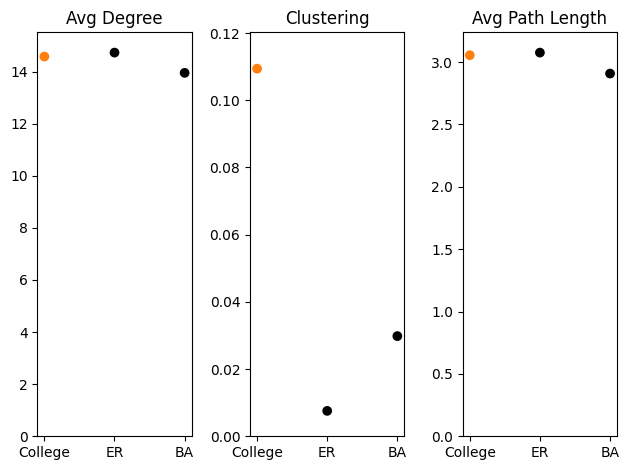

In [32]:
labels = ["Avg Degree", "Clustering", "Avg Path Length"]
x = range(3)  # Dummy x-axis, not used for plotting anymore

metrics_college = [m_college[0], m_college[1], m_college[2] if m_college[2] else 0]
metrics_er = [m_er[0], m_er[1], m_er[2] if m_er[2] else 0]
metrics_ba = [m_ba[0], m_ba[1], m_ba[2] if m_ba[2] else 0]

fig, axes = plt.subplots(nrows=1, ncols=3)

for mix, (lbl, ax) in enumerate(zip(labels, axes)):
    y_vals = [
        metrics_college[mix],
        metrics_er[mix],
        metrics_ba[mix],
    ]
    ax.scatter(range(3), y_vals, color=["C1", "k", "k"])
    ax.set_xticks(range(3))
    ax.set_xticklabels(["College", "ER", "BA"])
    ax.set_title(lbl)
    ax.set_ylim(0, ax.get_ylim()[-1] * 1.05)

plt.tight_layout()

### h. Key Trends in Real-World Networks
1. **Higher Clustering than Random**: Many real networks have significantly higher clustering than an equivalent ER graph.
2. **Short Path Lengths**: Real networks tend to exhibit small-world features (short paths), but not always to the same degree.
3. **Heavy-Tailed Degrees**: Many real networks show degree distributions that deviate from ER, often being more skewed.

These observations often prompt researchers to adopt specialized models or hybrids (e.g., combining small-world and scale-free elements) to capture real-world nuances.
### Quiz
1. Why do we often convert a directed network (like CollegeMsg) to undirected for certain measurements?  
2. What is the role of the **largest connected component** when computing average path length?  
3. (True/False) Real networks universally have very short path lengths and high clustering.  
4. Give one reason why a real network might not perfectly match **any** single theoretical model.  
5. List two ways in which real networks can vary significantly from one another (domain-based differences).
### Activities to Practice
1. **Add Another Real Dataset**: If you have access to another network (e.g., a co-authorship or protein-interaction dataset), compute the same metrics and compare all in a single plot.
2. **Directed Measures**: Explore how to compute the **strongly connected components** and **directed path lengths** for CollegeMsg to see if you observe big differences from the undirected approach.
3. **In/Out Degree**: Plot the distribution of in-degree vs. out-degree in CollegeMsg to see if there's asymmetry (do some nodes have a high out-degree but low in-degree?).

*(Answers to quizzes will be provided at the end.)*



---
# 4.2: Statistical and Structural Fit
## Overview
After computing empirical metrics, a further step is to **formally compare** how well theoretical models fit real networks. This involves:
- **Statistical tests** (e.g., KS test, maximum likelihood).
- **Visual comparisons** (comparing distributions).
- **Hypothesis testing** to assess whether the observed data could plausibly come from a given model.

We’ll touch on key techniques and illustrate them with the **CollegeMsg** dataset alongside ER, WS, and BA networks.
### a. Objective
- Understand how to **quantify** the similarity between real data and a generated network model.
- Explore standard **statistical tests** and **goodness-of-fit** measures.
- Carry out **hypothesis testing** (e.g., does the observed degree distribution match the model’s predicted distribution?).
### b. Introduction
Key concepts in **statistical fitting** of network models:
1. **Parameter Estimation**: For an ER model, we estimate $ p $. For BA, we choose $ m $. For WS, we pick $ k $ and $\beta$.
2. **Goodness-of-Fit**: Use metrics like the Kolmogorov–Smirnov (KS) test on the degree distribution or other structural properties (e.g., clustering).
3. **Likelihood-Based Approaches**: Attempt to compute the likelihood of the observed graph given a particular model. This can be complex for many network models.
### c. Measuring Fit: KS Test, Maximum Likelihood, etc.
- **KS Test on Degree Distribution**: Compare the empirical cumulative distribution function (CDF) of degrees with the theoretical or model-based CDF.
- **Likelihood Approaches**: For instance, in a power-law fit, you might use maximum likelihood methods to estimate $\alpha$ and then compute a goodness-of-fit metric.
- **Limitations**: Real networks have more structure than just the degree distribution (e.g., community structure, correlations).
### d. Examples/Code (compare ER, WS, BA with CollegeMsg)
Below is a simplified illustration of how you might compare degree distributions using the KS test from `scipy`.


In [33]:
import networkx as nx
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# Suppose we have G_college_undirected from the previous section
degrees_col = [G_college_undirected.degree(n) for n in G_college_undirected.nodes()]

# Create an ER graph with matched node/edge counts
num_nodes = G_college_undirected.number_of_nodes()
num_edges = G_college_undirected.number_of_edges()
p_est = (2 * num_edges) / (num_nodes * (num_nodes - 1))
G_er_cmp = nx.erdos_renyi_graph(num_nodes, p_est)
degrees_er = [G_er_cmp.degree(n) for n in G_er_cmp.nodes()]

# Basic KS test (just comparing degree arrays):
stat_er, pval_er = stats.ks_2samp(degrees_col, degrees_er)
print("ER vs CollegeMsg: KS statistic =", stat_er, "p-value =", pval_er)

# Similarly for BA or WS:
# BA
import math

m_ba = max(1, math.floor(np.mean(degrees_col) / 2))
G_ba_cmp = nx.barabasi_albert_graph(num_nodes, m_ba)
degrees_ba = [G_ba_cmp.degree(n) for n in G_ba_cmp.nodes()]
stat_ba, pval_ba = stats.ks_2samp(degrees_col, degrees_ba)
print("BA vs CollegeMsg: KS statistic =", stat_ba, "p-value =", pval_ba)

# WS
k_ws = int(np.mean(degrees_col))  # approximate
G_ws_cmp = nx.watts_strogatz_graph(num_nodes, k_ws, 0.05)
degrees_ws = [G_ws_cmp.degree(n) for n in G_ws_cmp.nodes()]
stat_ws, pval_ws = stats.ks_2samp(degrees_col, degrees_ws)
print("WS vs CollegeMsg: KS statistic =", stat_ws, "p-value =", pval_ws)

ER vs CollegeMsg: KS statistic = 0.5481832543443917 p-value = 2.2039054647734336e-262
BA vs CollegeMsg: KS statistic = 0.540810953133228 p-value = 5.819952700860506e-255
WS vs CollegeMsg: KS statistic = 0.6540284360189573 p-value = 0.0


*(This approach is a rough measure. High-level structural differences might not be fully captured by just the degree distribution comparison.)*
### e. Explanation
- **KS Test**: A low p-value suggests the two distributions differ significantly. A high p-value means we can’t confidently reject the hypothesis that both samples come from the same distribution.  
- **Caution**: This test only focuses on degrees. Many network properties remain untested (clustering, assortativity, etc.).
- **Insight**: Even if degrees match, the actual arrangement of edges (and resulting global structure) might differ dramatically.
### f. Hypothesis Testing for Network Models
1. **Null Hypothesis**: The real data is generated by the chosen model.  
2. **Test Statistic**: KS statistic, or other structural metrics.  
3. **Outcome**: If the p-value is below a certain threshold, we reject the model (at that confidence level). If it’s high, we fail to reject it—but that doesn’t necessarily prove the model is correct, just that we lack evidence to refute it.
4. **Extensions**: More refined tests might incorporate multiple metrics or a parametric bootstrap approach.
### g. Practical Activities/Code (visualize goodness-of-fit)
**Activity Prompt**:
1. Create CDF plots for the CollegeMsg degree distribution and each model’s distribution (ER, WS, BA).  
2. Compute the KS statistic and highlight the maximum difference on the CDF plot.  
3. Interpret whether one model appears to fit better than the others.

*(No starter code here—build on the previous examples.)*
### h. Common Pitfalls and Biases
- **Sampling Bias**: Real network data might be incomplete or sampled (e.g., crawling a subset of a large web).
- **Finite-Size Effects**: The power-law or small-world features might only emerge at large $ n $.  
- **Overfitting**: Tweaking parameters to match one metric (degree distribution) might ruin the fit for another (clustering).
- **Multiple Hypotheses**: Testing many models without corrections can lead to spurious conclusions.




### Quiz
1. What does the KS test measure when comparing two distributions (e.g., degrees)?  
2. Why might matching only the degree distribution be insufficient to confirm a model “fits” a real network?  
3. (True/False) A high KS test p-value definitively proves the real network and model are the same.  
4. Name one advantage and one disadvantage of using the KS test for network data.  
5. Briefly explain the concept of a **null hypothesis** in statistical testing of network models.
### Activities to Practice
1. **Parameter Sweep**: For each model (ER, WS, BA), generate multiple versions with slightly different parameters. Run the KS test for each. Plot how the p-value changes with parameter choices.
2. **Combine Metrics**: Devise a scoring function that combines degree distribution fit, clustering difference, and average path length difference. Compare how each model scores.
3. **Visual Check**: Plot adjacency matrix samples from the real data vs. the models (using a small sub-sample) to get a visual sense of structure differences.

*(Answers provided later.)*



---
# 4.3: Model Selection and Real-World Implications
## Overview
Finally, we look at the **practical** process of **model selection**—how do we decide which network model (ER, WS, BA, or variations) best suits the data or the application? We also discuss the real-world consequences of choosing one model over another, from design decisions in infrastructure to understanding patterns in social/biological systems.
### a. Objective
- Understand **criteria** used to choose a network model (e.g., goodness-of-fit, interpretability, domain relevance).
- Learn how to **balance** multiple metrics (degree distribution, clustering, path length, community structure).
- Explore how these models **impact real-world applications**, like network resilience, disease spread, or marketing strategies.
### b. Introduction
Model selection is often:
1. **Iterative**: We generate candidate models, compare them to data, refine parameters or model assumptions.
2. **Multi-Criteria**: We rarely rely on a single metric. Instead, we consider multiple structural properties and practical constraints.
3. **Domain-Informed**: Real contexts (e.g., biology, social science) might prefer certain models or incorporate domain knowledge (e.g., triadic closure in social networks).
### c. Criteria for Choosing a Model
1. **Statistical Fit**: Does the model replicate observed distributions (degree, clustering, etc.)?  
2. **Computational Tractability**: Some models are easier to simulate or analyze at large scales.  
3. **Interpretability**: A more interpretable model might be preferred in social sciences.  
4. **Predictive Power**: Can the model predict future link formation or other dynamics?  
5. **Domain Constraints**: Directed vs. undirected, weighted vs. unweighted, known communities, etc.
### d. Examples/Code (model selection approach on CollegeMsg)
Here’s a conceptual approach to scoring each model on multiple metrics:
1. Fit parameters (e.g., $ p $ for ER, $\beta$ for WS, $ m $ for BA).
2. Generate multiple simulations for each model, average their metrics.
3. Compute a “distance” from the real data’s metrics.
4. Pick the model with the lowest total distance (or highest combined p-value).


In [34]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# ... (previous code) ...

# Construct a BA graph
import math

m_value = max(1, math.floor(m_college[0] / 2))  # from average_degree
G_ba_test = nx.barabasi_albert_graph(num_nodes, m_value)
G_ba_test_undirected = G_ba_test.copy()  # already undirected
# Calling the get_graph_metrics function correctly
m_ba = get_graph_metrics(G_ba_test_undirected)

# Plot metrics
# ... (rest of the code) ...

# 5: Advanced Topics & Real-World Applications
# 5.1: Hybrid and Evolving Network Models
## Overview
In many real-world scenarios, networks don’t strictly follow a single pattern (ER, WS, or BA). Instead, they often exhibit properties of **both** small-world and scale-free structures, or they evolve under dynamic conditions. This leads to **hybrid** network models and the study of **time-varying** network phenomena.

In this section, we will:
- Explore why combining small-world and scale-free mechanisms can be necessary.
- Look at how growth patterns and dynamic processes shape real networks like **CollegeMsg**.
- Present examples and code for **hybrid models** and **evolving** network approaches.
### a. Objective
1. Understand **why** simple models (e.g., pure WS or BA) may not fully capture real data.
2. Demonstrate how to **combine** small-world rewiring with preferential attachment, creating a **hybrid**.
3. Examine **dynamic growth** patterns, exploring how networks like CollegeMsg might change over time.
4. Use **visualization** techniques to compare the hybrid/evolving models with real data.
### b. Introduction
- **Hybrid Models**: Sometimes called “WS + BA” or other combinations that incorporate both high clustering (from WS) and heavy-tailed degree distributions (from BA).
- **Evolving Networks**: Real networks (like social media platforms) grow, lose edges, or reorganize over time. Analyzing these dynamics can reveal significant patterns beyond static snapshots.

**Motivation**: In practice, many real systems:
- Exhibit **short path lengths** (small-world).
- Have **hubs** due to preferential attachment (scale-free).
- Are **dynamic**, with edges forming or dissolving over time.
### c. Combining Small-World & Scale-Free Properties
1. **Starting Point**: A ring lattice (like Watts–Strogatz) for local clustering.
2. **Preferential Attachment**: When new nodes join, they preferentially connect to high-degree nodes.
3. **Occasional Rewiring**: Existing edges can be “rewired,” providing random shortcuts to maintain small-world effects.

By balancing these processes, networks may retain both high clustering **and** scale-free degree distributions.
### d. Examples/Code (hybrid model generation with CollegeMsg references)
Below is a conceptual example that merges WS and BA ideas:

1. Initialize nodes in a ring structure (k-nearest neighbors).
2. Allow new nodes to join with preferential attachment to existing high-degree nodes.
3. Periodically rewire some edges with probability $\beta$.

**Disclaimer**: This is a high-level sketch, not an official “named” model.


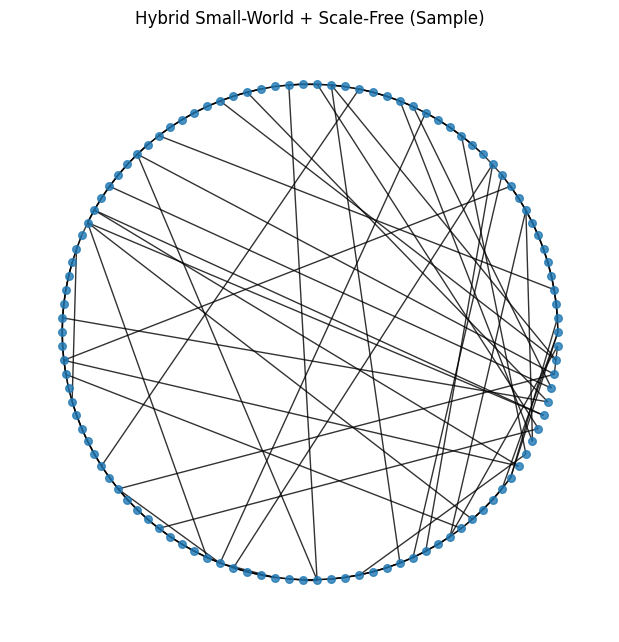

In [35]:
import networkx as nx
import random
import matplotlib.pyplot as plt


def hybrid_small_world_scale_free(n, k=4, beta=0.1, m_attach=2):
    """
    Creates a hybrid network that starts with a WS ring of 'n' nodes and 'k' edges
    per node, rewiring with prob 'beta', then adds new nodes with preferential attachment
    (m_attach edges per new node).
    """
    # Step 1: Create a WS ring (without the built-in function for clarity)
    G = nx.Graph()
    G.add_nodes_from(range(n))

    # Connect ring neighbors k//2 on each side
    half_k = k // 2
    for node in range(n):
        for i in range(1, half_k + 1):
            neighbor = (node + i) % n
            G.add_edge(node, neighbor)

    # Rewire edges with probability beta
    for node in range(n):
        # Only consider edges in one direction to avoid double checks
        neighbors = [(node + i) % n for i in range(1, half_k + 1)]
        for nb in neighbors:
            if random.random() < beta:
                # Remove the existing edge
                if G.has_edge(node, nb):
                    G.remove_edge(node, nb)
                # Add a random new edge
                new_target = random.choice(list(G.nodes()))
                while new_target == node or G.has_edge(node, new_target):
                    new_target = random.choice(list(G.nodes()))
                G.add_edge(node, new_target)

    # Step 2: Add new nodes with preferential attachment (for demonstration)
    # We'll add some fraction of new nodes, say 10% more
    additional_nodes = int(0.1 * n)
    start_idx = n
    for new_node in range(start_idx, start_idx + additional_nodes):
        G.add_node(new_node)
        # preferential attachment step
        degrees_sum = sum(dict(G.degree()).values())
        chosen = set()
        while len(chosen) < m_attach:
            for node, deg in G.degree():
                if (
                    random.random() < (deg / degrees_sum)
                    and node not in chosen
                    and node != new_node
                ):
                    chosen.add(node)
                if len(chosen) == m_attach:
                    break
        for c in chosen:
            G.add_edge(new_node, c)

    return G


# Demonstrate usage
n_demo = 100  # base ring size
k_demo = 4
beta_demo = 0.1
m_attach_demo = 2

G_hybrid = hybrid_small_world_scale_free(n_demo, k_demo, beta_demo, m_attach_demo)

plt.figure(figsize=(6, 6))
nx.draw_circular(G_hybrid, node_size=30, alpha=0.8)
plt.title("Hybrid Small-World + Scale-Free (Sample)")
plt.show()

### e. Explanation
- **Initialization**: We start with a WS-like structure for local clustering.
- **Rewiring**: Creates shortcuts, reducing path lengths (the small-world aspect).
- **New Nodes**: Preferentially attach to high-degree nodes, injecting a scale-free flavor.
- **Result**: We get a network that might have moderate clustering, short path lengths, **and** heavy-tailed degrees (depending on parameters).

Though simplistic, it illustrates how to blend ideas from different models.
### f. Dynamic Growth Patterns
Even beyond initial creation, real networks evolve:
- **Edge Formation & Deletion**: Social ties form and dissolve, content pages appear/disappear, etc.
- **Node Activity**: Some nodes (users/sites) become inactive; new nodes join.
- **Non-Stationary Processes**: The rules of attachment might change over time (e.g., a social platform’s new friend recommendation feature).

Observing **CollegeMsg** over time (via timestamps) might reveal bursts of activity and periodic effects (e.g., academic calendar influence).





### g. Practical Activities/Code (visualize hybrid networks)
**Activity Prompt**:
1. Modify the above hybrid model to **log** the degree distribution at each major step (initial ring, after rewiring, after adding new nodes).
2. Plot how the degree distribution evolves at each stage.
3. Compare with the final **CollegeMsg** distribution to see if it more closely resembles a pure WS or BA or something in between.



### h. Comparison to Observed Real Data
- **Empirical Check**: Does **CollegeMsg** exhibit both small-world (high clustering, short path) and scale-free (heavy tail) properties?
- **Parameter Tuning**: We can adjust $\beta$ for rewiring or the number of new nodes added via preferential attachment to see if we match the data’s metrics more closely.
- **Limitations**: Real networks might also have community structures, directed edges, and dynamic patterns that exceed the scope of simple hybrid models.

*(For complex real data, advanced or domain-specific models may be more appropriate.)*
### Quiz
1. What motivates the combination of small-world and scale-free features in a single network model?  
2. (True/False) A hybrid WS+BA approach can capture both high clustering and heavy-tailed degrees.  
3. How might dynamic growth (adding/removing edges over time) further complicate network modeling?  
4. Give one real-world example where a hybrid model (small-world + scale-free) might be more realistic than a pure model.  
5. Why is it still challenging to perfectly mimic real networks even with hybrid or evolving models?
### Activities to Practice
1. **Parameter Sweeps**: Explore different $\beta$ rewiring probabilities and different “m_attach” values. Visualize how the resulting networks compare in clustering and degree distribution.
2. **Directed Hybrid**: Attempt to replicate a hybrid approach but for a directed graph, if you want to align more closely with the directed CollegeMsg dataset.
3. **Temporal Simulation**: If you have timestamps from CollegeMsg, try modeling each day or week as a step. Let new nodes join, others leave, and see if you can replicate the final structure.




# 5.2: Temporal Analysis of CollegeMsg (Longitudinal Studies)
## Overview
**Temporal networks** evolve over time. The **CollegeMsg** dataset, with timestamped private messages, provides an excellent case study to observe:
- Growth or decline in active edges.
- Periodic or bursty communication patterns.
- Temporal clustering and how connectivity changes across time windows.

We will:
- Discuss methods to **slice** the network by time.
- Compute metrics over sequential snapshots.
- Visualize how network structure evolves in real data.
### a. Objective
1. Understand the significance of a **longitudinal** or **temporal** view (beyond a static snapshot).
2. Practice slicing CollegeMsg data into **time windows** (daily, weekly, monthly).
3. Observe changes in **degree distributions**, **connected components**, or **clustering** across these windows.
4. Identify potential **bursts** or **seasonality** (e.g., academic calendar).
### b. Introduction
Real networks rarely stay static:
- New edges appear as users interact.
- Old edges (relationships) might fade or go inactive.
- External factors (events, holidays, policies) can cause sudden changes (bursts or drops).

**Temporal Analysis** helps us see:
- How quickly a network grows or stabilizes.
- If nodes form short-lived communities or persistently clustered groups.
- Potential “peak times” for messaging or interaction bursts.
### c. Time Evolution of Network Metrics
1. **Activity Over Time**: Count how many edges appear in each time window.  
2. **Degree Evolution**: Does the average degree or distribution shift as the network matures?  
3. **Components**: Are more nodes gradually becoming part of a giant component, or do they stay fragmented?
4. **Clustering & Path Length**: Do triadic closures grow stronger over time, or is there a random fluctuation pattern?
### d. Examples/Code (analyzing time-stamped edges in CollegeMsg)
Below is a conceptual approach:
1. Parse timestamps from **CollegeMsg.txt**.
2. Choose a window size (e.g., 1 week).
3. Accumulate edges within each window.
4. Build a subgraph for each window and compute metrics.


In [36]:
file_path

'/Users/boris/Documents/teaching/ML on graphs/ML-on-Graphs/data/CollegeMsg.txt'

In [37]:
import networkx as nx
import matplotlib.pyplot as plt
import datetime
import os


edge_list_time = []

if os.path.exists(file_path):
    # If the file exists, read it
    with open(file_path, "r") as f:
        for line in f:
            # Format: u v t
            parts = line.strip().split()
            if len(parts) == 3:
                u, v, t = parts
                # Convert to int or float as needed
                u = int(u)
                v = int(v)
                t = float(t)  # or convert to datetime if it represents a date/time
                edge_list_time.append((u, v, t))
else:
    print(f"File {file_path} not found. Using a placeholder dataset.")

    # -------------------------------------------------------------
    # Placeholder: Generate a small synthetic dataset with timestamps
    # -------------------------------------------------------------
    import random
    import time

    # For demonstration, let's make a small set of edges with ascending timestamps
    num_nodes = 10
    timestamp = 0.0
    for _ in range(30):
        u = random.randint(0, num_nodes - 1)
        v = random.randint(0, num_nodes - 1)
        if u != v:
            edge_list_time.append((u, v, timestamp))
        timestamp += 1.0  # just increment by 1 for each edge

# Sort edges by timestamp
edge_list_time.sort(key=lambda x: x[2])

edge_list_time[0:4]

[(1, 2, 1082040961.0),
 (3, 4, 1082155839.0),
 (5, 2, 1082414391.0),
 (6, 7, 1082439619.0)]

In [38]:
SECONDS_IN_DAY = 24 * 60 * 60  #
days_step = 1


def build_subgraph_in_range(edges_time, start_t, end_t):
    G_temp = nx.DiGraph()
    for u, v, t in edges_time:
        if start_t <= t < end_t:
            G_temp.add_edge(u, v)
    return G_temp


# Compute weekly bins
time_bins = []
if edge_list_time:
    min_t = edge_list_time[0][2]
    max_t = edge_list_time[-1][2]
    current_t = min_t

    while current_t < max_t:
        time_bins.append((current_t, current_t + days_step * SECONDS_IN_DAY))
        current_t += days_step * SECONDS_IN_DAY
else:
    time_bins.append((0, 1))

print(f"Created {len(time_bins):,} time bins")

Created 194 time bins


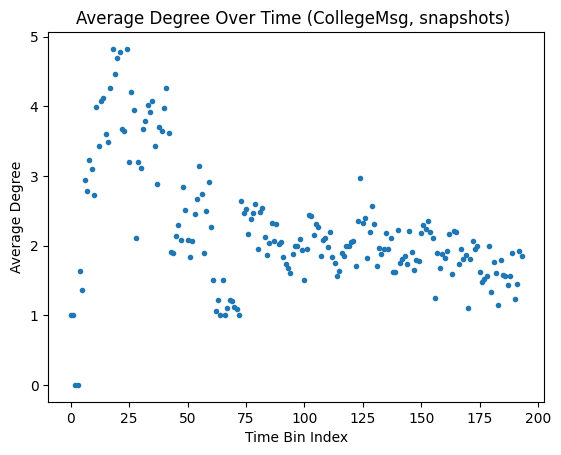

In [39]:
avg_degs = []
for start_t, end_t in time_bins:
    G_window = build_subgraph_in_range(edge_list_time, start_t, end_t)
    if G_window.number_of_nodes() > 0:
        avg_deg = (2 * G_window.number_of_edges()) / G_window.number_of_nodes()
        avg_degs.append(avg_deg)
    else:
        avg_degs.append(0)

# Plot average degree over time
plt.plot(range(len(avg_degs)), avg_degs, ".")
plt.title("Average Degree Over Time (CollegeMsg, snapshots) ")
plt.xlabel("Time Bin Index")
plt.ylabel("Average Degree")
plt.show()

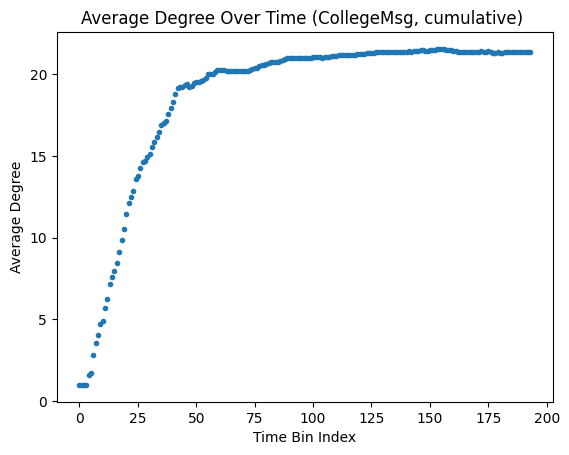

In [40]:
# now  - the cumulative approach
avg_degs = []
start_t = time_bins[0][0]
for _, end_t in time_bins:
    G_window = build_subgraph_in_range(edge_list_time, start_t, end_t)
    if G_window.number_of_nodes() > 0:
        avg_deg = (2 * G_window.number_of_edges()) / G_window.number_of_nodes()
        avg_degs.append(avg_deg)
    else:
        avg_degs.append(0)

# Plot average degree over time
plt.plot(range(len(avg_degs)), avg_degs, ".")
plt.title("Average Degree Over Time (CollegeMsg, cumulative) ")
plt.xlabel("Time Bin Index")
plt.ylabel("Average Degree")
plt.show()

### e. Explanation
- **Time-Slicing**: By dividing the dataset into intervals, we see how connectivity evolves.
- **Edge Accumulation vs. Rolling Window**: Decide if you want a “cumulative” approach (edges remain once they’ve appeared) or a “rolling window” approach (only edges in the last X days).
- **Complexity**: Large datasets may require efficient indexing. Also, real timestamps might not align cleanly to days/weeks.

*(For more advanced analyses, we might use libraries like `tulip`, `dynamic-graphs` in Python, or specialized dynamic network libraries.)*


### f. Activity Bursts and Seasonality
- **Bursty Behavior**: Often, real communication data have spikes of activity (e.g., exam periods, holiday greetings).  
- **Seasonality**: Periodic fluctuations (weekdays vs. weekends, semester schedules).  
- **Insights**: May inform system design, resource allocation, or understanding social dynamics in the network (e.g., focusing engagement strategies during high-traffic periods).
### g. Practical Activities/Code (plot network snapshots over time)
**Activity Prompt**:
1. Select **3 distinct snapshots** (e.g., early, mid, late period).
2. Build and visualize the subgraphs (for a subset of nodes if needed).
3. Compare how clustering, average degree, or largest component size changes across these snapshots.
### h. Challenges in Temporal Data
1. **Data Gaps**: Missing timestamps or partial logs can distort analysis.
2. **Evolving Node Set**: New users join, old users might vanish, leading to dynamic node sets.
3. **Non-Stationarity**: The generative process might change (e.g., new features on a social platform).
4. **Computational Load**: Rebuilding and analyzing multiple large subgraphs can be resource-intensive.

Despite these complexities, temporal analysis offers a deeper understanding of how networks form, grow, and reorganize in real-time.
### Quiz
1. In a **temporal** network analysis, why might we choose a **rolling window** instead of a **cumulative** approach?  
2. (True/False) Seasonal patterns in network traffic are rarely observed in communication datasets.  
3. Give one example of a **burst** in network activity and a potential real-world cause (e.g., exam times in a university).  
4. Why might the largest connected component get bigger (or smaller) over time in a social network?  
5. Name one method for visualizing how a network changes over multiple snapshots.
### Activities to Practice
1. **Cumulative vs. Rolling**: Implement both strategies on CollegeMsg. Compare how the average degree differs if you keep adding edges vs. only look at recent edges.
2. **Peak Detection**: Identify the time bins with the highest edge count. Investigate whether they correspond to known events (e.g., start of a semester).
3. **Temporal Path Length**: Compute average path length in each time bin. Does it get shorter or longer as the network grows?



---
# 5.3: Real-World Implementation and Future Directions
## Overview
Finally, we consider **practical implementation** details and emerging research directions:
- **Scalability**: Handling **large** networks in memory and time.
- **Dynamic Communities** and **Multi-layer** networks.
- **Industry & Research** applications (e.g., recommendation systems, epidemic modeling, infrastructure planning).

We’ll tie back to **CollegeMsg** as an example of how real-world constraints (like large user bases or data collection limits) guide model choice and analysis methods.
### a. Objective
1. Discuss **computational constraints** for analyzing large-scale networks.
2. Introduce **multi-layer** or **multi-aspect** networks, where edges come from different types of interactions.
3. Highlight future research topics (e.g., online streaming analysis, real-time community detection).
4. Explore how these advanced methods apply to **CollegeMsg** or other massive, evolving datasets.
### b. Introduction
**Scalability** is crucial:
- Many real datasets exceed millions (or billions) of edges. In-memory graph representation can be a challenge.
- Algorithms for community detection or shortest paths might become infeasible for extremely large networks unless optimized or approximated.

**Multi-layer Networks**:
- A user might have different **types** of connections (e.g., message, follow, react).
- Combining these layers can reveal hidden patterns not seen in any single layer alone.

**Real-Time or Streaming**:
- Edges arrive continuously, requiring incremental updates to metrics or communities.
- Example: Social media feed or sensor networks.
### c. Scalability and Computational Constraints
1. **Data Structures**: Adjacency lists vs. adjacency matrices. Sparse storage is often essential.
2. **Distributed Processing**: Tools like Apache Spark, GraphX, or Hadoop-based approaches for large-scale graph analysis.
3. **Approximation Algorithms**: For large networks, approximate methods (like random walks, sampling) might be used to estimate metrics quickly.
4. **Data Cleaning & Preprocessing**: Handling duplicates, inconsistent timestamps, or partial user data.
### d. Examples/Code (large-scale graph analysis with CollegeMsg)
While **CollegeMsg** is not extremely large, we can illustrate some points:
1. **Efficient loading**: Read edges in chunks, build the graph progressively.
2. **Sparse data**: Store edges in adjacency lists or use specialized libraries like `igraph`, `PySpark`.
3. **Parallelizable tasks**: For instance, computing degrees in parallel or distributing connected components across nodes in a cluster.

*(We won’t provide a full distributed code example here, but note that the general approach is to partition data and aggregate results.)*
### e. Explanation
- **Real Data Issues**: Even moderate-size datasets (tens/hundreds of thousands of nodes) can be demanding if you compute complex metrics (like betweenness centrality) or repeated time-slicing.
- **Batch vs. Streaming**: Some approaches gather data and run offline analysis (batch), while others must update in near-real-time (streaming).

**Trade-off**: More sophisticated analysis can yield deeper insights but requires more computational resources.
### f. Emerging Trends (e.g., dynamic communities, multi-layer networks)
- **Dynamic Communities**: Communities that form, merge, or split over time. Algorithms like **DynaMo** or incremental versions of **Louvain**.  
- **Multi-layer**: Combining social edges, geographic proximity, online interactions, etc., into a single framework. Layers might have different weights, directions, or timescales.
- **Graph Neural Networks (GNNs)**: Methods that learn representations for nodes/edges in a deep-learning context, often tackling link prediction, node classification, or community detection in large dynamic graphs.
### g. Practical Activities/Code (evaluate performance on real data)
**Activity Prompt**:
1. Try computing more advanced metrics (like **betweenness centrality**) on subsets of CollegeMsg. Observe the runtime.
2. Create a function that approximates betweenness using random sampling of node pairs instead of the entire graph (Brandes algorithm can still be heavy).
3. Compare results to a small-scale ground truth to see if approximation is acceptable.
### h. Future Applications in Industry and Research
- **Infrastructure and Traffic**: Designing robust networks to handle surges (small-world layering + scale-free backbone).
- **Epidemic Modeling**: Understanding disease spread in scale-free or multi-layer social contact networks.
- **Recommender Systems**: Graph-based algorithms for personalized suggestions, leveraging communities or preference-based edges.
- **Smart Cities**: Sensor networks and IoT data, requiring dynamic, multi-layer analysis to optimize resources (e.g., energy grids, traffic flows).

As networks grow ever larger and more complex, hybrid models, dynamic analysis, and scalable algorithms are increasingly vital in both research and practical domains.
### Quiz
1. Why might a **multi-layer** approach provide a richer understanding of a network than a single-layer approach?  
2. (True/False) Exact computation of centrality metrics like betweenness is always feasible for large real-world networks.  
3. Give one example of a **dynamic community** scenario in a real network.  
4. How do **graph neural networks (GNNs)** fit into the future of network analysis?  
5. Name a real-world application area where **dynamic** or **multi-layer** network analysis could be transformative.
### Activities to Practice
1. **Incremental Community Detection**: Use a library that supports dynamic community detection. Compare how communities evolve if you add edges in the order of their timestamps in CollegeMsg.
2. **Layered Analysis**: If you have other datasets, attempt to overlay them on CollegeMsg nodes (e.g., friend relationships + message interactions) to see if they reveal new patterns.
3. **Scalability Check**: Benchmark how long it takes to compute certain metrics (degree, clustering, shortest paths) as you gradually increase the size of the network.

*(Answers will be provided later.)*
---
**End of Section 5**  
This concludes our **Advanced Topics & Real-World Applications** unit, and the main content of **Unit 5: Network Formation Models**.
## Unit 1 Quiz Answers (Sections 1.1, 1.2, 1.3)
**Section 1.1: Fundamentals of Random Graphs (Erdős–Rényi)**
1. **$ G(n, p) $** is a random graph model with $ n $ nodes, where each edge appears independently with probability $ p $.  
2. For large $ n $ and small $ p $, the degree distribution is approximately **Poisson**.  
3. We typically match $ p $ by equating the average degree of the real network to the expected average degree $\bar{k} \approx p(n-1)$.  
4. ER graphs often fail to capture **high clustering** or **heavy-tailed** degree distributions commonly seen in real networks.  
5. **False**; each edge in an ER graph is formed independently of others.

**Section 1.2: Generating and Analyzing Erdős–Rényi Graphs**
1. We choose $ p $ such that the expected average degree $ \bar{k} \approx p(n-1) $.  
2. Real networks can have **heavy tails**, **community structures**, or **degree correlations** not seen in a pure ER model.  
3. The clustering coefficient in an ER graph is roughly $ p $ and is typically much lower than in many real networks.  
4. **True**; a small $\beta$ (rewiring probability) is about WS, but for ER, a low $ p $ leads to sparser connectivity and typically larger path lengths. (Interpreted for ER’s random edges.)  
5. If a network has 10,000 edges and 2,000 nodes (directed), $ p \approx \frac{10{,}000}{2{,}000 \times (2{,}000-1)} \approx \frac{10{,}000}{4{,}000{,}000} = 0.0025 $.

**Section 1.3: Properties and Phase Transitions in Erdős–Rényi Graphs**
1. A **giant component** is one that contains a finite fraction of all nodes for large $ n $.  
2. Around $ p = \frac{1}{n} $, a giant component emerges in an undirected ER graph.  
3. Real networks may be “far” above the threshold because they exhibit higher connectivity than the minimal point needed for large connected components.  
4. We detect a giant strongly connected component in a directed ER graph by examining strongly connected components as $ p $ varies; a large SCC signals the phase transition.  
5. **True**; in small graphs, phase transitions can appear “smeared” or less abrupt.
## Unit 2 Quiz Answers (Sections 2.1, 2.2, 2.3)
**Section 2.1: Introduction to Small-World Phenomena**
1. Short path lengths and high clustering.  
2. $\beta$ controls the fraction of edges that are randomly rewired, moving from a regular lattice ($\beta=0$) to a random graph ($\beta=1$).  
3. In most cases, WS graphs maintain a **higher clustering** than an equivalent ER graph with a similar number of nodes/edges.  
4. **True**; small $\beta$ means little rewiring, so path lengths remain closer to those of a regular lattice.  
5. Real networks may have additional structures (community/hubs) or external influences that deviate from the basic WS layout.

**Section 2.2: Rewiring Probability and Network Properties**
1. $\beta$ determines how many edges are “shortcuts,” drastically affecting path lengths and clustering.  
2. Even a small number of shortcuts can link distant parts of the network, reducing path length significantly.  
3. **False**; the WS model does not naturally produce a power-law distribution.  
4. WS relies on local ring connections plus a fraction of rewired shortcuts, while real networks can have correlated edges and non-uniform degrees that differ from the simple WS mechanism.  
5. A mismatch could arise from, e.g., large hubs or extremely dense local communities not accounted for by WS.

**Section 2.3: Applications of Small-World Models**
1. **Biological** (C. elegans neural network) and **technological** (power grids) are common small-world examples besides social networks.  
2. By placing nodes on a ring and drawing edges, you can visually inspect if many edges cross the ring (long-range) or stay within neighbors.  
3. Computing diameter or average path length for very large networks (especially if disconnected) can be computationally expensive.  
4. **False**; the original WS model is undirected and unweighted. Directed/weighted versions require extensions.  
5. Short path lengths and high clustering alone do not automatically prove a network is strictly “small-world,” though it strongly suggests small-world characteristics.
## Unit 3 Quiz Answers (Sections 3.1, 3.2, 3.3)
**Section 3.1: Growth and Preferential Attachment**
1. **Growth** (network grows over time) and **preferential attachment** (new links favor high-degree nodes).  
2. **False**; BA networks have a **power-law** degree distribution, not Poisson.  
3. High-degree nodes attract more edges because of their existing popularity (the “rich get richer”).  
4. $ m $ is the number of edges each new node contributes upon joining; it sets the baseline average degree.  
5. The **World Wide Web** is a classic example, along with citation networks and some metabolic networks.

**Section 3.2: Degree Distribution and Hubs**
1. A power-law shows up as a **straight line** on a log-log plot (negative slope).  
2. Hubs have disproportionately many connections; removing them can fragment the network or drastically increase path lengths.  
3. **False**; real networks often deviate from a perfect power law due to finite size or other effects.  
4. A **rank-degree** plot sorts nodes by degree and plots rank vs. degree, while a histogram bins degrees to show frequency.  
5. **Advantage**: Quick communication, resilience to random failure; **Disadvantage**: Vulnerable to targeted attacks on hubs.

**Section 3.3: Extensions and Variations of the Barabási–Albert Model**
1. Weighted edges carry a **capacity** or **intensity** of interaction, critical in real-world systems (e.g., bandwidth or frequency of contact).  
2. In a preferential attachment model with fitness, each node has an intrinsic property $\eta_i$ that multiplies its degree, influencing edge formation.  
3. Communities are subgroups of nodes with denser connections internally. In a scale-free network, you might still see tight clusters among hubs.  
4. **False**; introducing fitness can still preserve scale-free characteristics, though it modifies the distribution.  
5. **E-commerce** or content-sharing platforms, where popularity + intrinsic quality (“fitness”) both matter for forming new links.
## Unit 4 Quiz Answers (Sections 4.1, 4.2, 4.3)
**Section 4.1: Empirical Observations of Network Properties**
1. Many standard metrics (clustering, path length) assume an undirected or single-mode structure; converting to undirected is simpler to apply these common formulas.  
2. In a disconnected network, average path length is typically computed on the **largest connected component** to avoid infinite distances.  
3. **False**; while many real networks are “small-world,” not all have high clustering or short paths—some domains differ.  
4. Real networks often exhibit multiple structural features (heavy tails, clustering, communities) not captured by a single model’s assumptions.  
5. Examples include differences in **degree distribution** shape, **clustering** levels, or presence/absence of **communities**, depending on domain.

**Section 4.2: Statistical and Structural Fit**
1. The KS test measures the **maximum difference** between two cumulative distribution functions (CDFs) over all values.  
2. A network can match the degree distribution but differ in clustering, path length, or node correlations, so degree alone is insufficient.  
3. **False**; a high p-value only indicates we **cannot** reject the hypothesis; it doesn’t prove equivalence.  
4. **Advantage**: It’s a simple, well-known metric; **Disadvantage**: It only compares distributions and ignores topological arrangements or multi-dimensional aspects.  
5. The **null hypothesis** is that the real network data could be generated by the tested model (no significant difference); if we reject it, we say the data likely do not come from that model.

**Section 4.3: Model Selection and Real-World Implications**
1. Criteria include **clustering**, **path length**, **degree distribution** fit, computational feasibility, interpretability, domain constraints, etc.  
2. **False**; different domains have different structural tendencies and constraints, so a single model rarely fits all.  
3. E.g., an epidemiological model might underestimate spreading if it assumes random (ER-like) structure instead of a scale-free/hub-driven structure, leading to flawed interventions.  
4. A multi-metric approach prevents focusing on one aspect (like degree distribution) while ignoring others (like clustering or connectivity), providing a **more holistic** fit.  
5. One can add node **fitness** or **spatial constraints**, or require **local rewiring** to reflect real-world processes.

## Unit 5 Quiz Answers (Sections 5.1, 5.2, 5.3)
**Section 5.1: Hybrid and Evolving Network Models**
1. Real networks often show both **short path lengths** (small-world) and **heavy-tailed** degrees (scale-free). Combining them better reflects reality.  
2. **True**; by mixing rewiring (WS) and preferential attachment (BA), you can achieve both properties simultaneously.  
3. Over time, edges and nodes change, so static assumptions break down; modeling that dynamic aspect complicates predictions.  
4. **Example**: A large social media platform where there’s both local clustering among friend groups and global “celebrity” hubs.  
5. Even hybrid models can miss domain-specific details (directed edges, community structures, or external events), so exact replication of real networks remains challenging.

**Section 5.2: Temporal Analysis of CollegeMsg (Longitudinal Studies)**
1. A rolling window only includes edges from the recent period, providing a more **current** snapshot of activity, rather than cumulative.  
2. **False**; many communication datasets exhibit daily/weekly/seasonal cycles, so seasonality is quite common.  
3. A sudden spike in messages might occur around **exam periods**, **holidays**, or **registration deadlines**, etc.  
4. As users continue to connect, more nodes join the largest component, or if key hubs leave, the component might shrink.  
5. **Method**: Construct subgraphs for each time slice and animate or produce snapshot visuals to see how structure evolves.

**Section 5.3: Real-World Implementation and Future Directions**
1. Multiple layers capture different interaction types (e.g., messaging vs. following vs. physical proximity), revealing correlations you’d miss in a single-layer approach.  
2. **False**; exact computation of certain metrics (like betweenness or frequent dynamic updates) can be prohibitively expensive for very large networks.  
3. Example: Online communities that merge or split following social events, or employees migrating between projects in an organization.  
4. GNNs learn embeddings from graph data, enabling advanced tasks (like link prediction or node classification) at scale, and they can handle dynamic/multi-layer networks.  
5. Areas such as **epidemic modeling**, **multi-city traffic management**, or **social media analytics** can benefit greatly from dynamic or multi-layer analyses.
